# Devices Price Classification System using Python and Spring Boot


Dataset columns are as follows:
*  id - ID
*  battery_power - Total energy a battery can store in one time measured in mAh
*  blue - Has Bluetooth or not
*  clock_speed - The speed at which the microprocessor executes instructions
*  dual_sim - Has dual sim support or not
*  fc - Front Camera megapixels
*  four_g - Has 4G or not
*  int_memory - Internal Memory in Gigabytes
*  m_dep - Mobile Depth in cm
*  mobile_wt - Weight of mobile phone
*  n_cores - Number of cores of the processor
*  pc - Primary Camera megapixels
*  px_height - Pixel Resolution Height
*  px_width - Pixel Resolution Width
*  ram - Random Access Memory in Megabytes
*  sc_h - Screen Height of mobile in cm
*  sc_w - Screen Width of mobile in cm
*  talk_time - longest time that a single battery charge will last when you are
*  three_g - Has 3G or not
*  touch_screen - Has touch screen or not
*  wifi - Has wifi or not
*  price_range - This is the target variable with the value of:
    0 (low cost)
    1 (medium cost)
    2 (high cost)
    3 (very high cost)


# 1. **Data** Analysis


In [273]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [274]:
!gdown https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/edit#gid=1607079722 -O train.xlsx

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:44: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I
  warnings.warn(
Downloading...
From (original): https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/edit#gid=1607079722
From (redirected): https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/export?format=xlsx
To: /content/train.xlsx
174kB [00:00, 88.3MB/s]


In [275]:
df = pd.read_excel("train.xlsx")
df.head()

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0     1            1  
1          7        1             1     0            2  
2          9        1             1     0            2  
3         11        1             0     0            2  
4         15        1             1     0            1  

[5 rows x 21 columns]

missing values in the data

In [276]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [277]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [278]:
df.count()

battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               1995
four_g           1995
int_memory       1995
m_dep            1995
mobile_wt        1996
n_cores          1996
pc               1995
px_height        1996
px_width         1998
ram              1998
sc_h             1999
sc_w             1999
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64

In [279]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1135
px_width         1109
ram              1561
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [280]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  1995.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.310276   
std       439.418206     0.5001     0.816004     0.500035     4.335766   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  1995.000000  1995.000000  1995.000000  1996.000000  1996.000000  ...   
mean      0.521303    32.048120     0.502256   140.266533     4.518036  ...   
std       0.499671    18.146476     0.288530    35.384676     2.288946  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  1996.000000  1998.000000  1998.000000  1999.000000  1999.000000   
mean    644.651804  1251.287788  2124.262262    12.303652     5.766383   
std     443.355443   432.352930  1085.273372     4.212373     4.357400   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.000000   874.250000  1206.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2147.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3065.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [281]:
from pandas.plotting import scatter_matrix

matrix = df.corr(numeric_only=True)
target = matrix["price_range"].sort_values(ascending=False)

target

price_range      1.000000
ram              0.917119
battery_power    0.200723
px_width         0.166094
px_height        0.148184
int_memory       0.042589
sc_w             0.038777
pc               0.034639
fc               0.024999
three_g          0.023611
sc_h             0.023300
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.015494
n_cores          0.004598
m_dep           -0.000083
clock_speed     -0.006606
touch_screen    -0.030411
mobile_wt       -0.032457
Name: price_range, dtype: float64

In [282]:
for value in df["price_range"].unique():
    print(f"Price Range {value}")
    print("Bluetooth counts")
    print(df[df["price_range"]==value]["blue"].value_counts())

Price Range 1
Bluetooth counts
blue
0    255
1    245
Name: count, dtype: int64
Price Range 2
Bluetooth counts
blue
0    257
1    243
Name: count, dtype: int64
Price Range 3
Bluetooth counts
blue
1    259
0    241
Name: count, dtype: int64
Price Range 0
Bluetooth counts
blue
0    257
1    243
Name: count, dtype: int64


In [283]:
for value in df["price_range"].unique():
    print(f"Price Range {value}")
    print("Wifi")
    print(df[df["price_range"]==value]["wifi"].value_counts())

Price Range 1
Wifi
wifi
1    252
0    248
Name: count, dtype: int64
Price Range 2
Wifi
wifi
1    252
0    248
Name: count, dtype: int64
Price Range 3
Wifi
wifi
1    262
0    238
Name: count, dtype: int64
Price Range 0
Wifi
wifi
0    252
1    248
Name: count, dtype: int64


## **Crosstab**

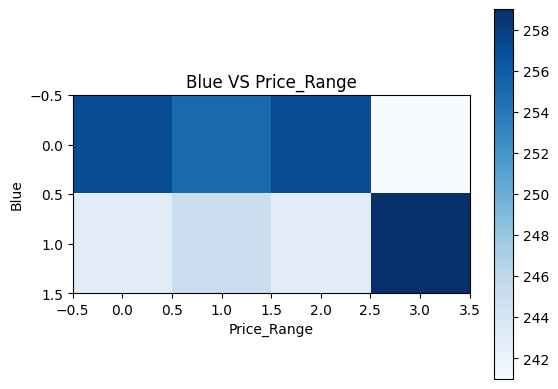

In [284]:
cm = pd.crosstab(df["blue"],df["price_range"])
plt.imshow(cm,cmap="Blues")
plt.title("Blue VS Price_Range")
plt.xlabel("Price_Range")
plt.ylabel("Blue")
plt.colorbar();

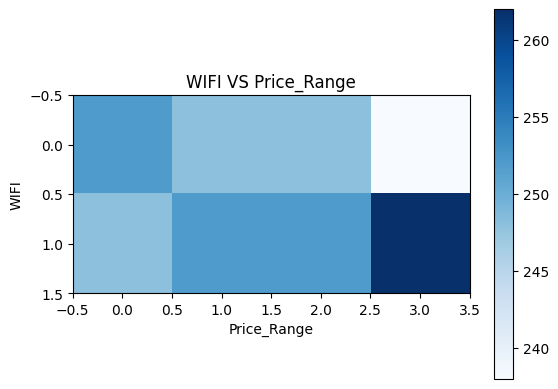

In [285]:
cm = pd.crosstab(df["wifi"],df["price_range"])
plt.imshow(cm,cmap="Blues")
plt.title("WIFI VS Price_Range")
plt.xlabel("Price_Range")
plt.ylabel("WIFI")
plt.colorbar();

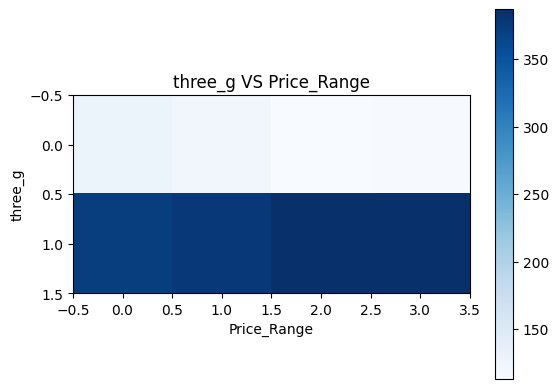

In [286]:
cm = pd.crosstab(df["three_g"],df["price_range"])
plt.imshow(cm,cmap="Blues")
plt.title("three_g VS Price_Range")
plt.xlabel("Price_Range")
plt.ylabel("three_g")
plt.colorbar();

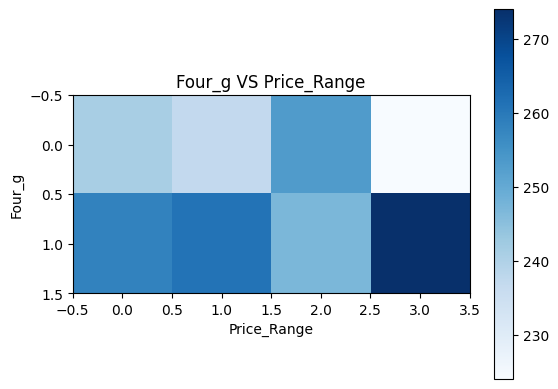

In [287]:
cm = pd.crosstab(df["four_g"],df["price_range"])
plt.imshow(cm,cmap="Blues")
plt.title("Four_g VS Price_Range")
plt.xlabel("Price_Range")
plt.ylabel("Four_g")
plt.colorbar();

## **ScalarMappable**

<ipython-input-24-0a25ca6b0335>:12: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Price Range")


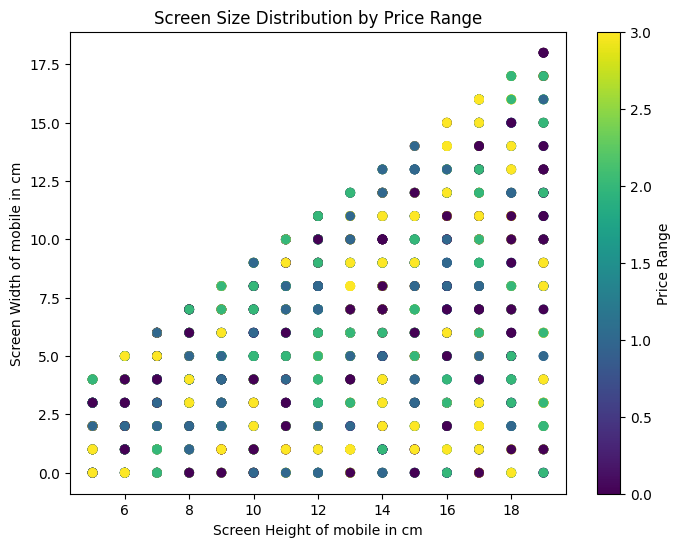

In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(x=df["sc_h"], y=df["sc_w"], c=df["price_range"], cmap="viridis")

plt.xlabel("Screen Height of mobile in cm")
plt.ylabel("Screen Width of mobile in cm")
plt.title("Screen Size Distribution by Price Range")

sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(min(df["price_range"]), max(df["price_range"])))
sm.set_array([])
plt.colorbar(sm, label="Price Range")

plt.show()


***Conclution: So the size of the screen does not have an effect on the range of the price***

## **Countplot**

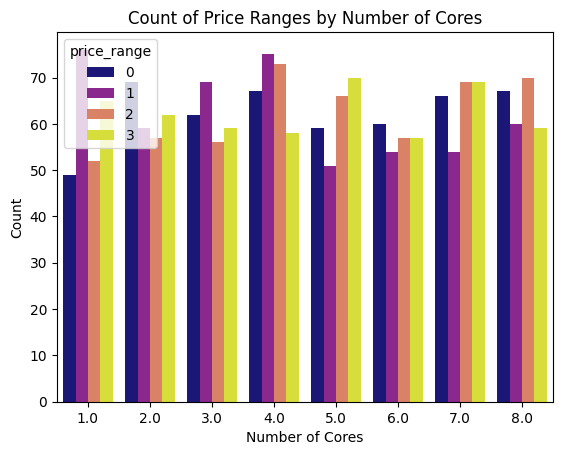

In [25]:
sb.countplot(x="n_cores", hue="price_range", data=df, palette="plasma")
plt.xlabel("Number of Cores")
plt.ylabel("Count")
plt.title("Count of Price Ranges by Number of Cores")
plt.show()

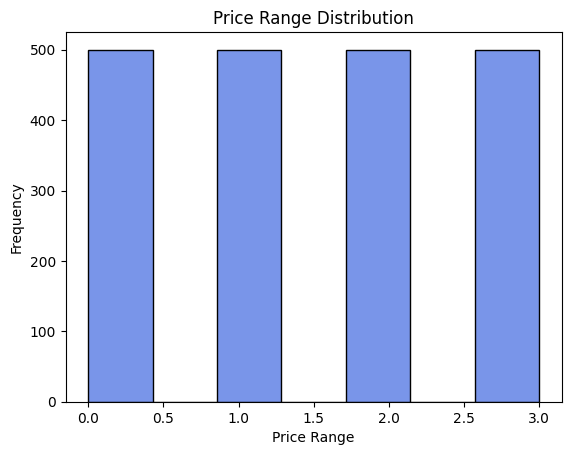

In [26]:
sb.histplot(data=df, x="price_range", bins=7, color='royalblue', alpha=0.7)
plt.title("Price Range Distribution")
plt.xlabel("Price Range")
plt.ylabel("Frequency")
plt.show()

***Conclution: the data is distrubited***

## **Swarm plots to check the effect of the price range with multiple features**

<ipython-input-27-aef704c7bc90>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.swarmplot(x="price_range", y="ram", data=df, palette=palette)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


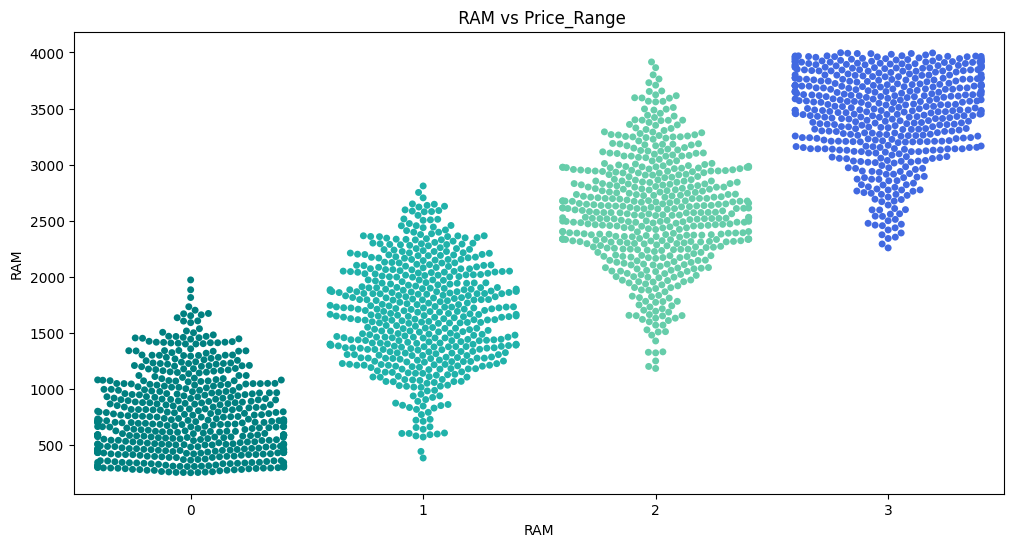

In [27]:
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

plt.figure(figsize=(12, 6))
sb.swarmplot(x="price_range", y="ram", data=df, palette=palette)
plt.title(" RAM vs Price_Range")
plt.xlabel("RAM")
plt.ylabel("RAM")
plt.show()


<ipython-input-28-47734ff6f39b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.swarmplot(x="price_range", y="battery_power", data=df, palette=palette)


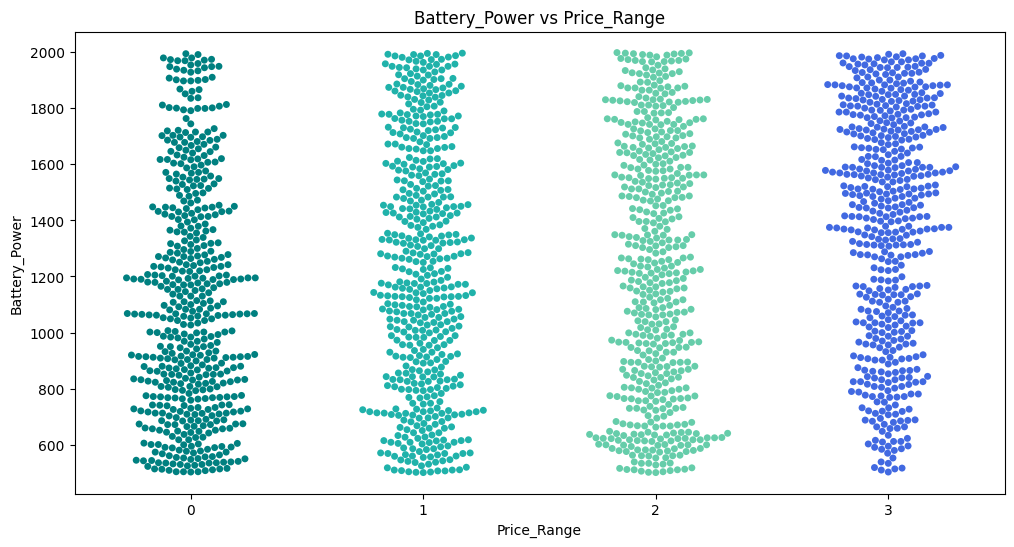

In [28]:
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

plt.figure(figsize=(12, 6))
sb.swarmplot(x="price_range", y="battery_power", data=df, palette=palette)
plt.title("Battery_Power vs Price_Range")
plt.xlabel("Price_Range")
plt.ylabel("Battery_Power")
plt.show()

<ipython-input-29-36ff598d00ca>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.swarmplot(x="price_range", y="blue", data=df, palette=palette)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


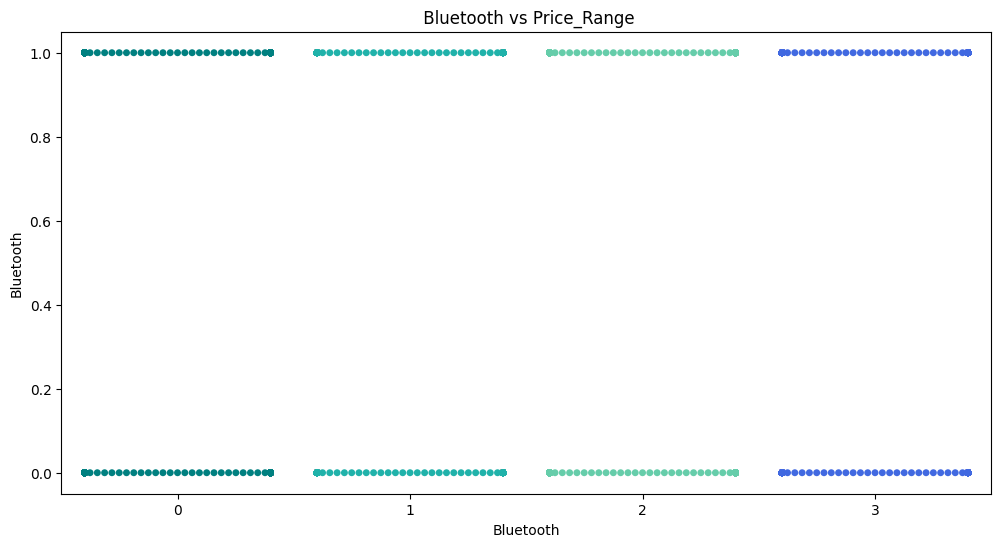

In [29]:
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

plt.figure(figsize=(12, 6))
sb.swarmplot(x="price_range", y="blue", data=df, palette=palette)
plt.title(" Bluetooth vs Price_Range")
plt.xlabel("Bluetooth")
plt.ylabel("Bluetooth")
plt.show()


<ipython-input-30-f0b088289fd2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.swarmplot(x="price_range", y="clock_speed", data=df, palette=palette)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 14.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seab

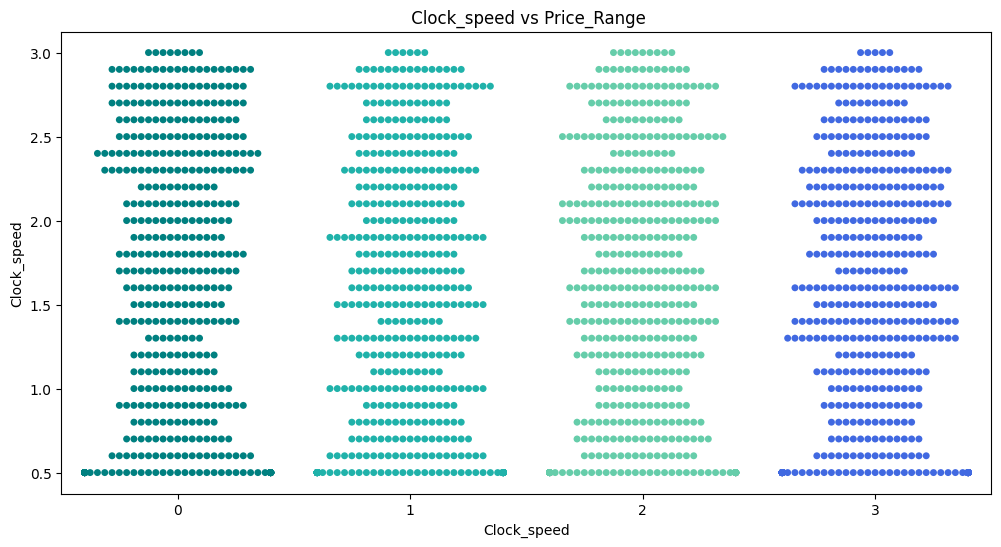

In [30]:
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

plt.figure(figsize=(12, 6))
sb.swarmplot(x="price_range", y="clock_speed", data=df, palette=palette)
plt.title(" Clock_speed vs Price_Range")
plt.xlabel("Clock_speed")
plt.ylabel("Clock_speed")
plt.show()


<ipython-input-31-643412140d31>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.swarmplot(x="price_range", y="fc", data=df, palette=palette)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 32.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 31.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categ

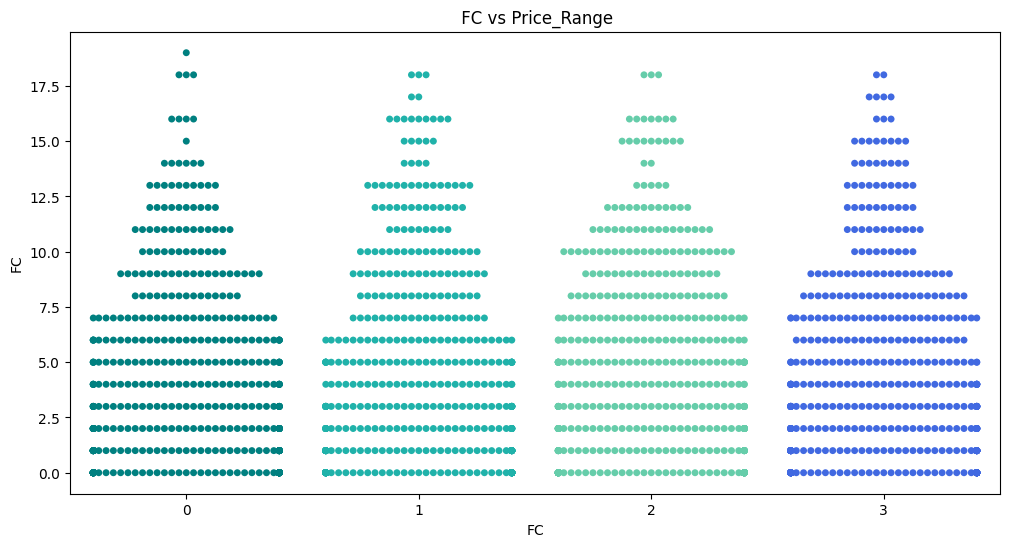

In [31]:
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

plt.figure(figsize=(12, 6))
sb.swarmplot(x="price_range", y="fc", data=df, palette=palette)
plt.title(" FC vs Price_Range")
plt.xlabel("FC")
plt.ylabel("FC")
plt.show()


<ipython-input-32-7e1fc7b7d99d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.swarmplot(x="price_range", y="talk_time", data=df, palette=palette)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/

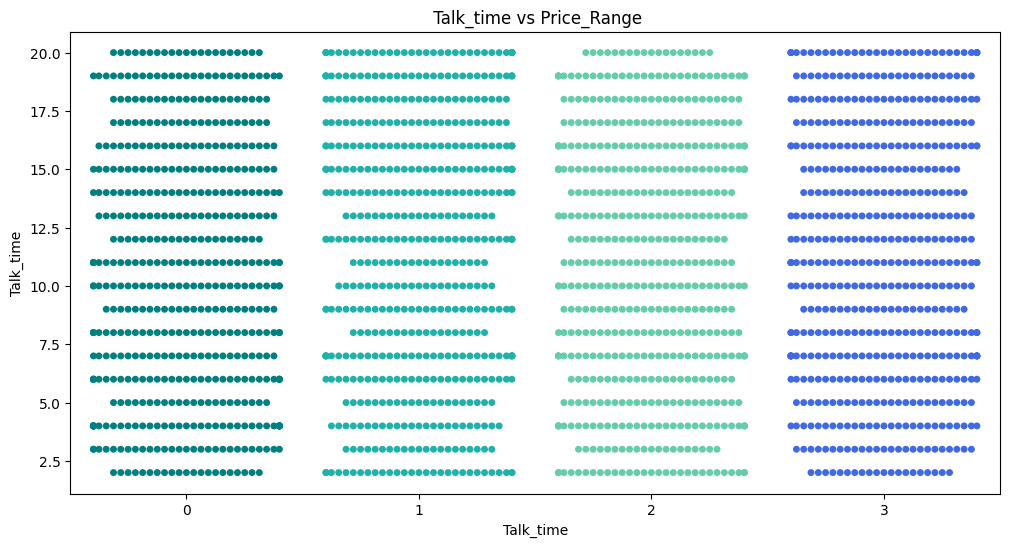

In [32]:
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

plt.figure(figsize=(12, 6))
sb.swarmplot(x="price_range", y="talk_time", data=df, palette=palette)
plt.title(" Talk_time vs Price_Range")
plt.xlabel("Talk_time")
plt.ylabel("Talk_time")
plt.show()


<ipython-input-33-2fc34e91dfd1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.swarmplot(x="price_range", y="three_g", data=df, palette=palette)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


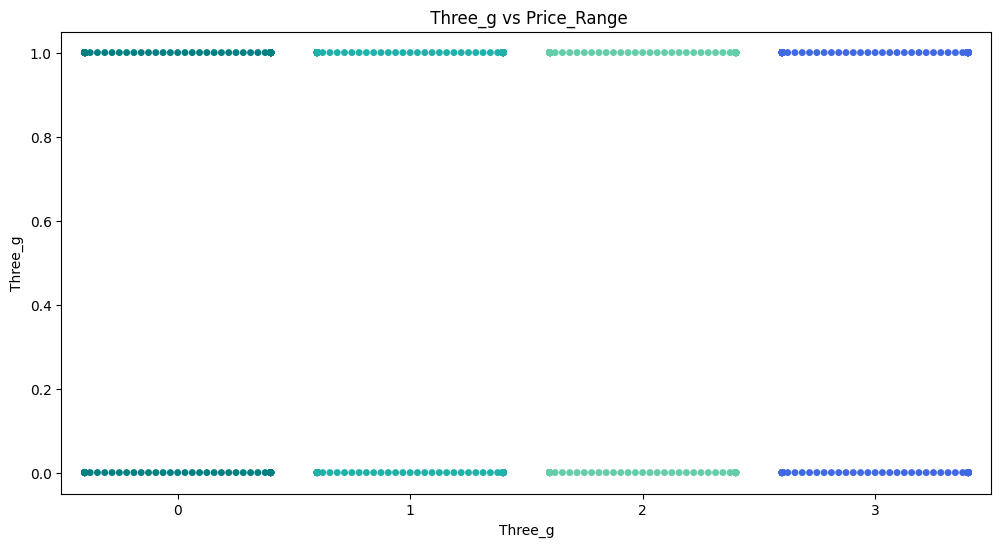

In [33]:
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

plt.figure(figsize=(12, 6))
sb.swarmplot(x="price_range", y="three_g", data=df, palette=palette)
plt.title(" Three_g vs Price_Range")
plt.xlabel("Three_g")
plt.ylabel("Three_g")
plt.show()


<ipython-input-34-55d7e6653afc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.swarmplot(x="price_range", y="wifi", data=df, palette=palette)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 87.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 90.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


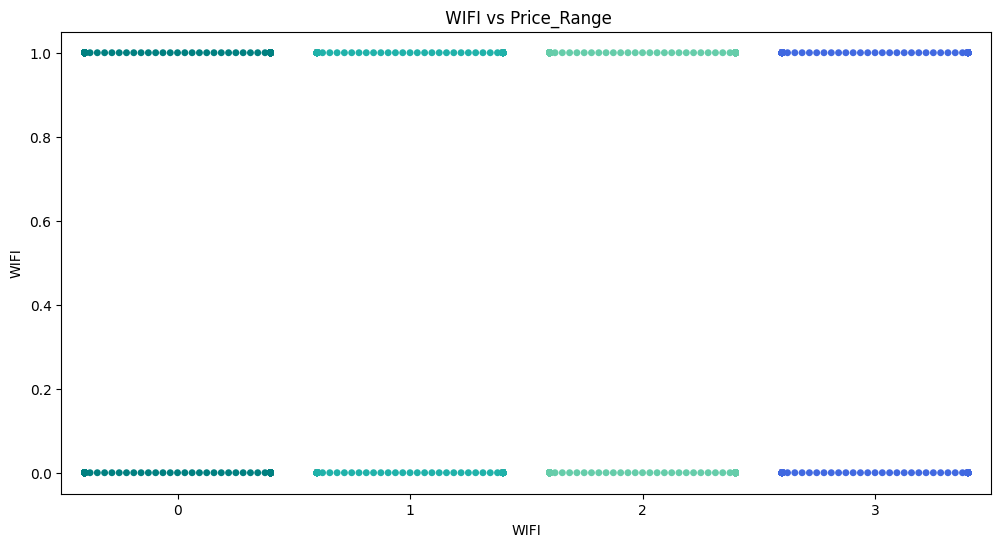

In [34]:
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

plt.figure(figsize=(12, 6))
sb.swarmplot(x="price_range", y="wifi", data=df, palette=palette)
plt.title(" WIFI vs Price_Range")
plt.xlabel("WIFI")
plt.ylabel("WIFI")
plt.show()


## Violin plot to check the effect of the price range with multiple features

<ipython-input-35-a4d142899f60>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x="price_range", y="ram", data=df, palette=palette)


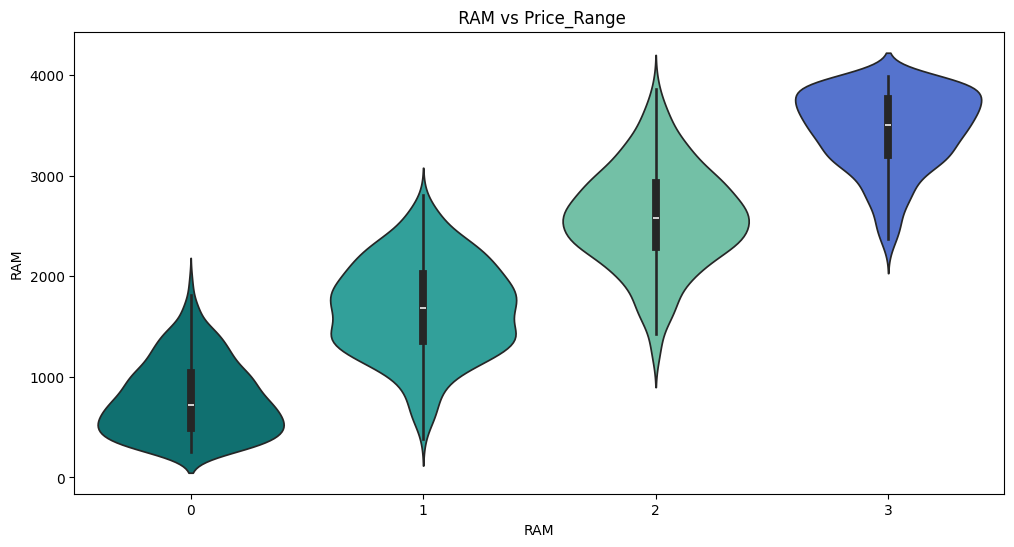

In [35]:
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

plt.figure(figsize=(12, 6))
sb.violinplot(x="price_range", y="ram", data=df, palette=palette)
plt.title(" RAM vs Price_Range")
plt.xlabel("RAM")
plt.ylabel("RAM")
plt.show()


<ipython-input-36-75d9f5e1bd0e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x="price_range", y="battery_power", data=df, palette=palette)


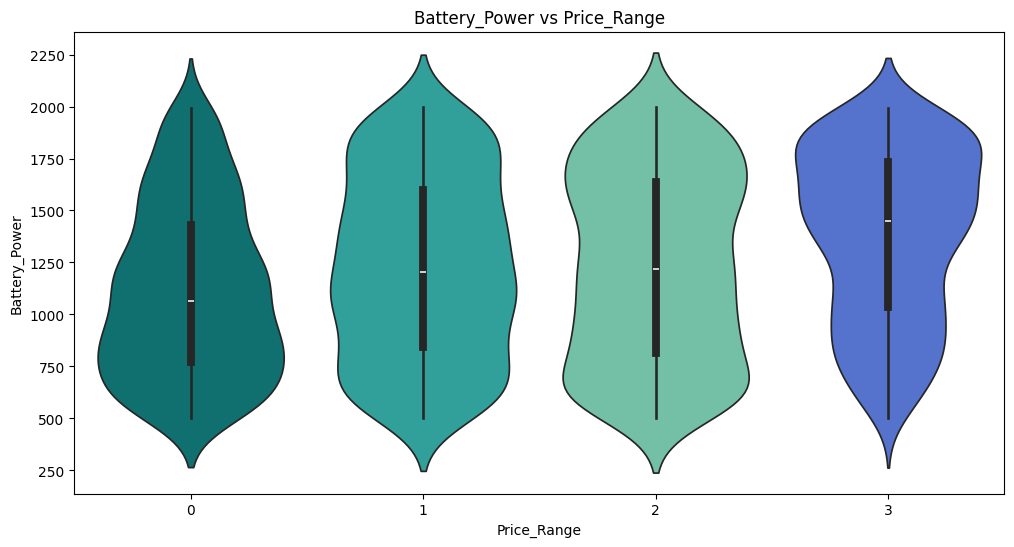

In [36]:
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

plt.figure(figsize=(12, 6))
sb.violinplot(x="price_range", y="battery_power", data=df, palette=palette)
plt.title("Battery_Power vs Price_Range")
plt.xlabel("Price_Range")
plt.ylabel("Battery_Power")
plt.show()


<ipython-input-37-19ccbe71c7dd>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x="price_range", y="blue", data=df, palette=palette)


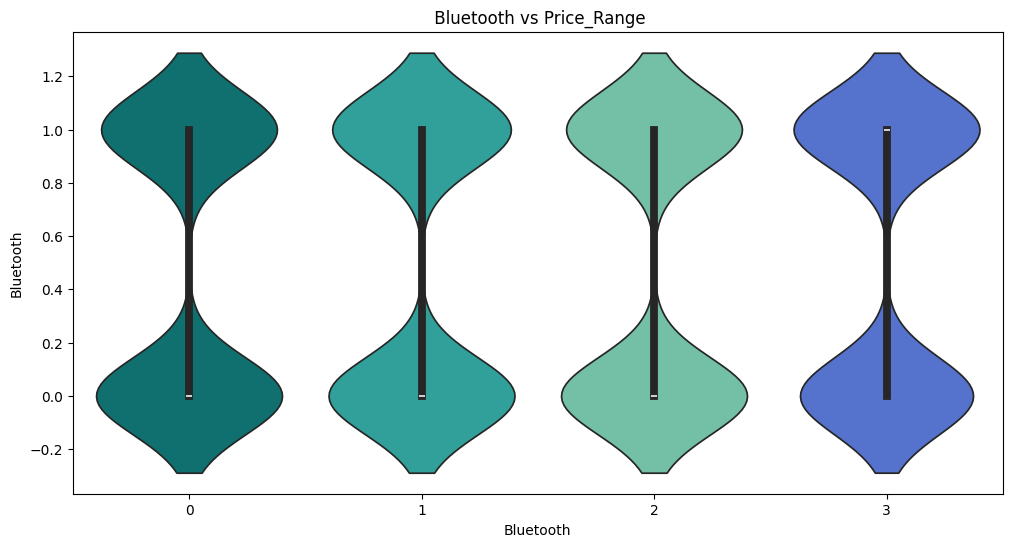

In [37]:
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

plt.figure(figsize=(12, 6))
sb.violinplot(x="price_range", y="blue", data=df, palette=palette)
plt.title(" Bluetooth vs Price_Range")
plt.xlabel("Bluetooth")
plt.ylabel("Bluetooth")
plt.show()


<ipython-input-38-3dc331896c72>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x="price_range", y="clock_speed", data=df, palette=palette)


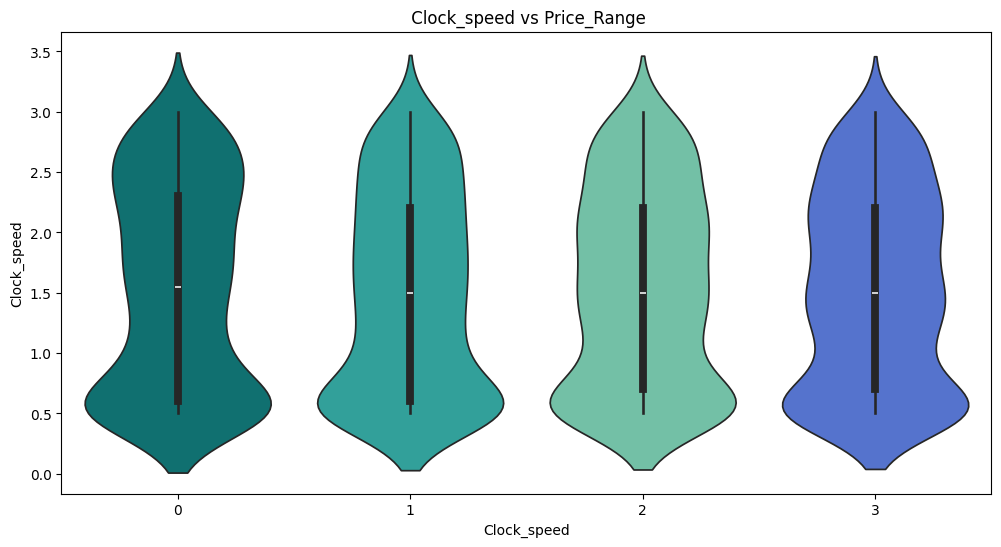

In [38]:
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

plt.figure(figsize=(12, 6))
sb.violinplot(x="price_range", y="clock_speed", data=df, palette=palette)
plt.title(" Clock_speed vs Price_Range")
plt.xlabel("Clock_speed")
plt.ylabel("Clock_speed")
plt.show()


<ipython-input-39-5d951f1e327f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x="price_range", y="fc", data=df, palette=palette)


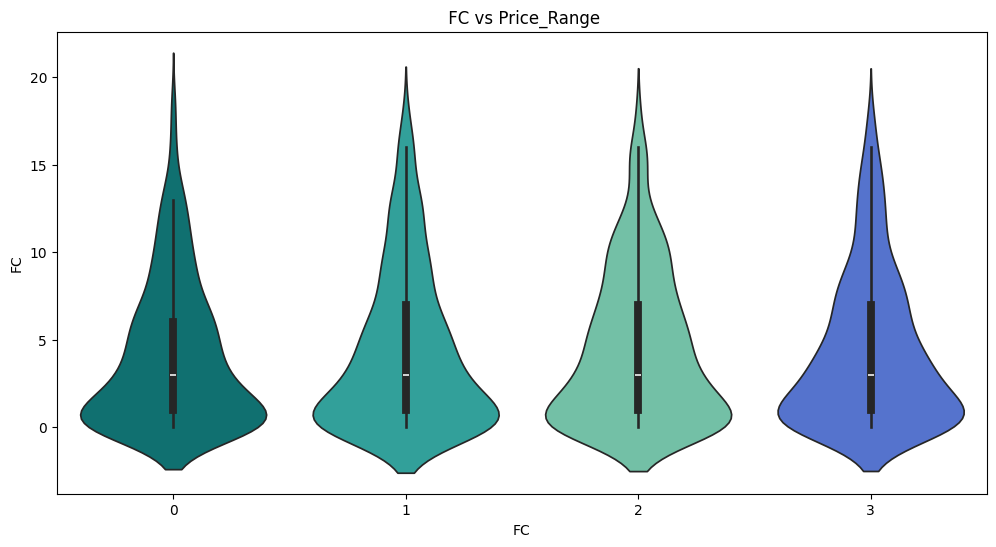

In [39]:
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

plt.figure(figsize=(12, 6))
sb.violinplot(x="price_range", y="fc", data=df, palette=palette)
plt.title(" FC vs Price_Range")
plt.xlabel("FC")
plt.ylabel("FC")
plt.show()


<ipython-input-40-a50e7ba25d9d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x="price_range", y="talk_time", data=df, palette=palette)


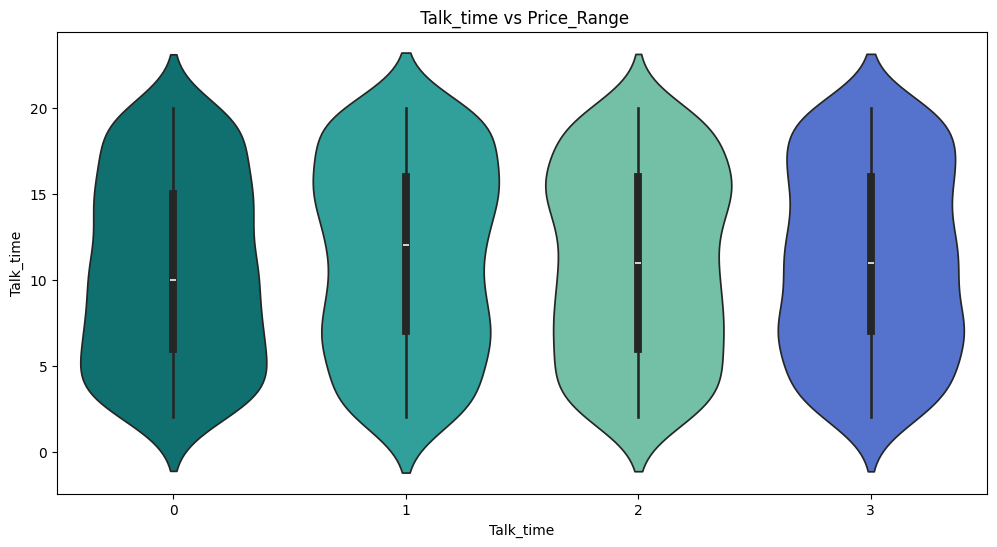

In [40]:
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

plt.figure(figsize=(12, 6))
sb.violinplot(x="price_range", y="talk_time", data=df, palette=palette)
plt.title(" Talk_time vs Price_Range")
plt.xlabel("Talk_time")
plt.ylabel("Talk_time")
plt.show()


<ipython-input-41-2b846bb48732>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x="price_range", y="three_g", data=df, palette=palette)


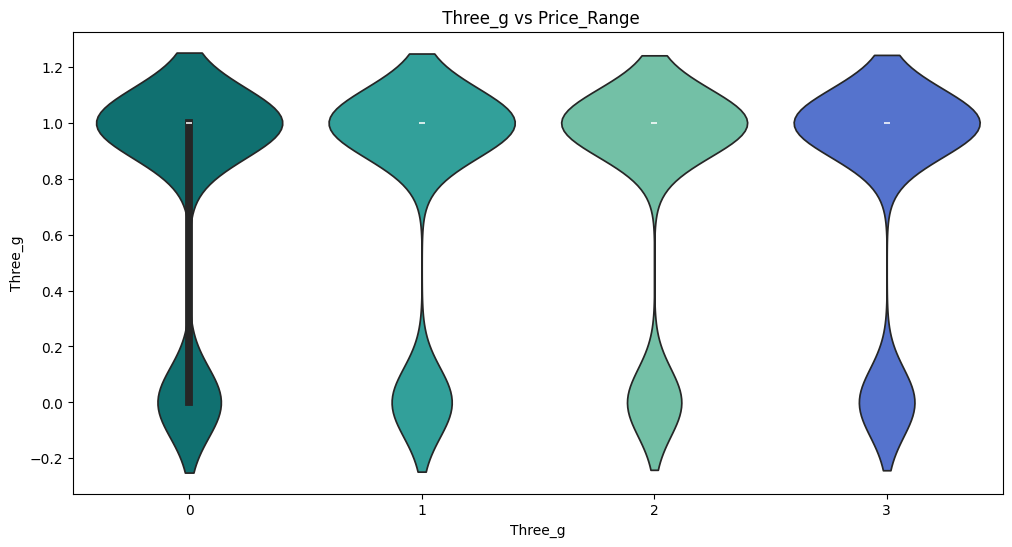

In [41]:
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

plt.figure(figsize=(12, 6))
sb.violinplot(x="price_range", y="three_g", data=df, palette=palette)
plt.title(" Three_g vs Price_Range")
plt.xlabel("Three_g")
plt.ylabel("Three_g")
plt.show()


<ipython-input-42-385e4b71544f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(x="price_range", y="wifi", data=df, palette=palette)


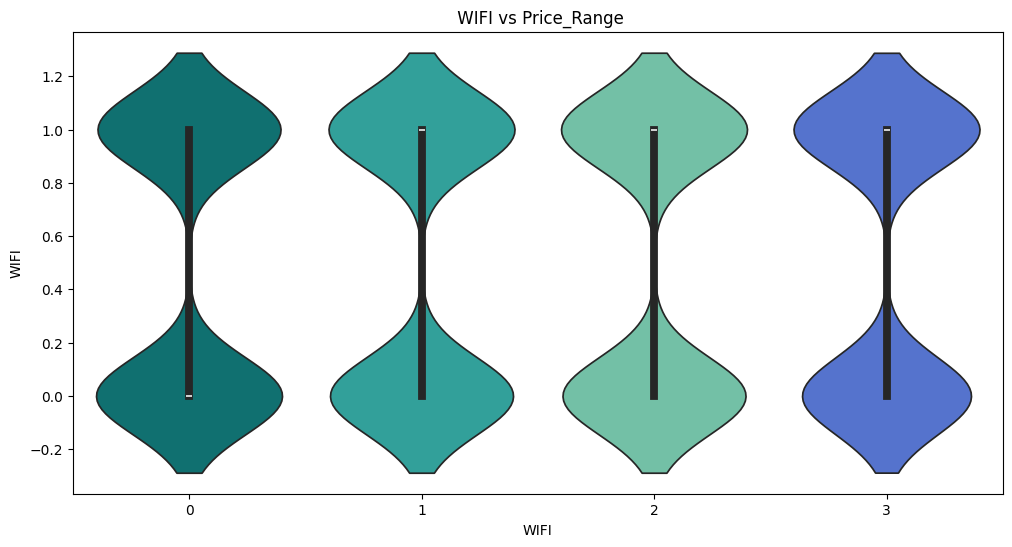

In [42]:
palette = ["teal", "lightseagreen", "mediumaquamarine", "royalblue"]

plt.figure(figsize=(12, 6))
sb.violinplot(x="price_range", y="wifi", data=df, palette=palette)
plt.title(" WIFI vs Price_Range")
plt.xlabel("WIFI")
plt.ylabel("WIFI")
plt.show()


## Conclusion:
In conclusion, none of the phone's features besides RAM stand out significantly.

To improve the baseline model, we can create new features based on existing data. These features include:

Screen area: This is calculated by multiplying the screen height by the screen width.
Pixel density: This is calculated by dividing the product of the pixel width and pixel height by the screen area.
Battery efficiency: This is calculated by dividing the talk time by the battery life.
Camera resolution: This is calculated by multiplying the front camera resolution by the rear camera resolution (assuming "fc" refers to front camera and "pc" refers to rear camera).
By incorporating these new features, we can assess their impact on the model's performance.



# **Training on the data as is**

#  **Modeling**

## Training

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

def evaluate_model(y_true, y_predicted):
  """
  This function evaluates a classification model by printing classification report
  and plotting the confusion matrix.

  Args:
      y_true (array-like): True labels for the classification task.
      y_predicted (array-like): Predicted labels for the classification task.
  """

  # Print classification report
  print(classification_report(y_true, y_predicted))

  # Generate confusion matrix
  cf_matrix = confusion_matrix(y_true, y_predicted)

  # Create ConfusionMatrixDisplay object
  cmd = ConfusionMatrixDisplay(cf_matrix)

  # Plot the confusion matrix
  cmd.plot()
  plt.show()



In [44]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


In [215]:
X = df.drop("price_range",axis=1)
y = df["price_range"]

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,
                                               random_state=21)

print(f"Train distrubistion {y_train.value_counts()/len(y_train)}")
print(f"Train distrubistion {y_val.value_counts()/len(y_val)}")


Train distrubistion price_range
2    0.256250
1    0.253125
3    0.253125
0    0.237500
Name: count, dtype: float64
Train distrubistion price_range
0    0.3000
3    0.2375
1    0.2375
2    0.2250
Name: count, dtype: float64


In [216]:
categorical_features = ["blue", "dual_sim", "four_g", "n_cores", "three_g","touch_screen", "wifi"]


numerical_features = [col for col in X.columns if col not in categorical_features]

In [217]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing values with most frequent term
    ('encoder', OneHotEncoder()) # Perform one-hot encoding
])

In [218]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Fill missing values with median
    ('scaler', StandardScaler()) # Perform standard scaling
])

In [219]:
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

In [220]:
# Fit and transform the data using the preprocessor pipeline
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)


### 1. Decision Tree Classifier

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

Accuracy of Decision Tree classifier on training set: 0.88
Accuracy of Decision Tree classifier on test set: 0.84


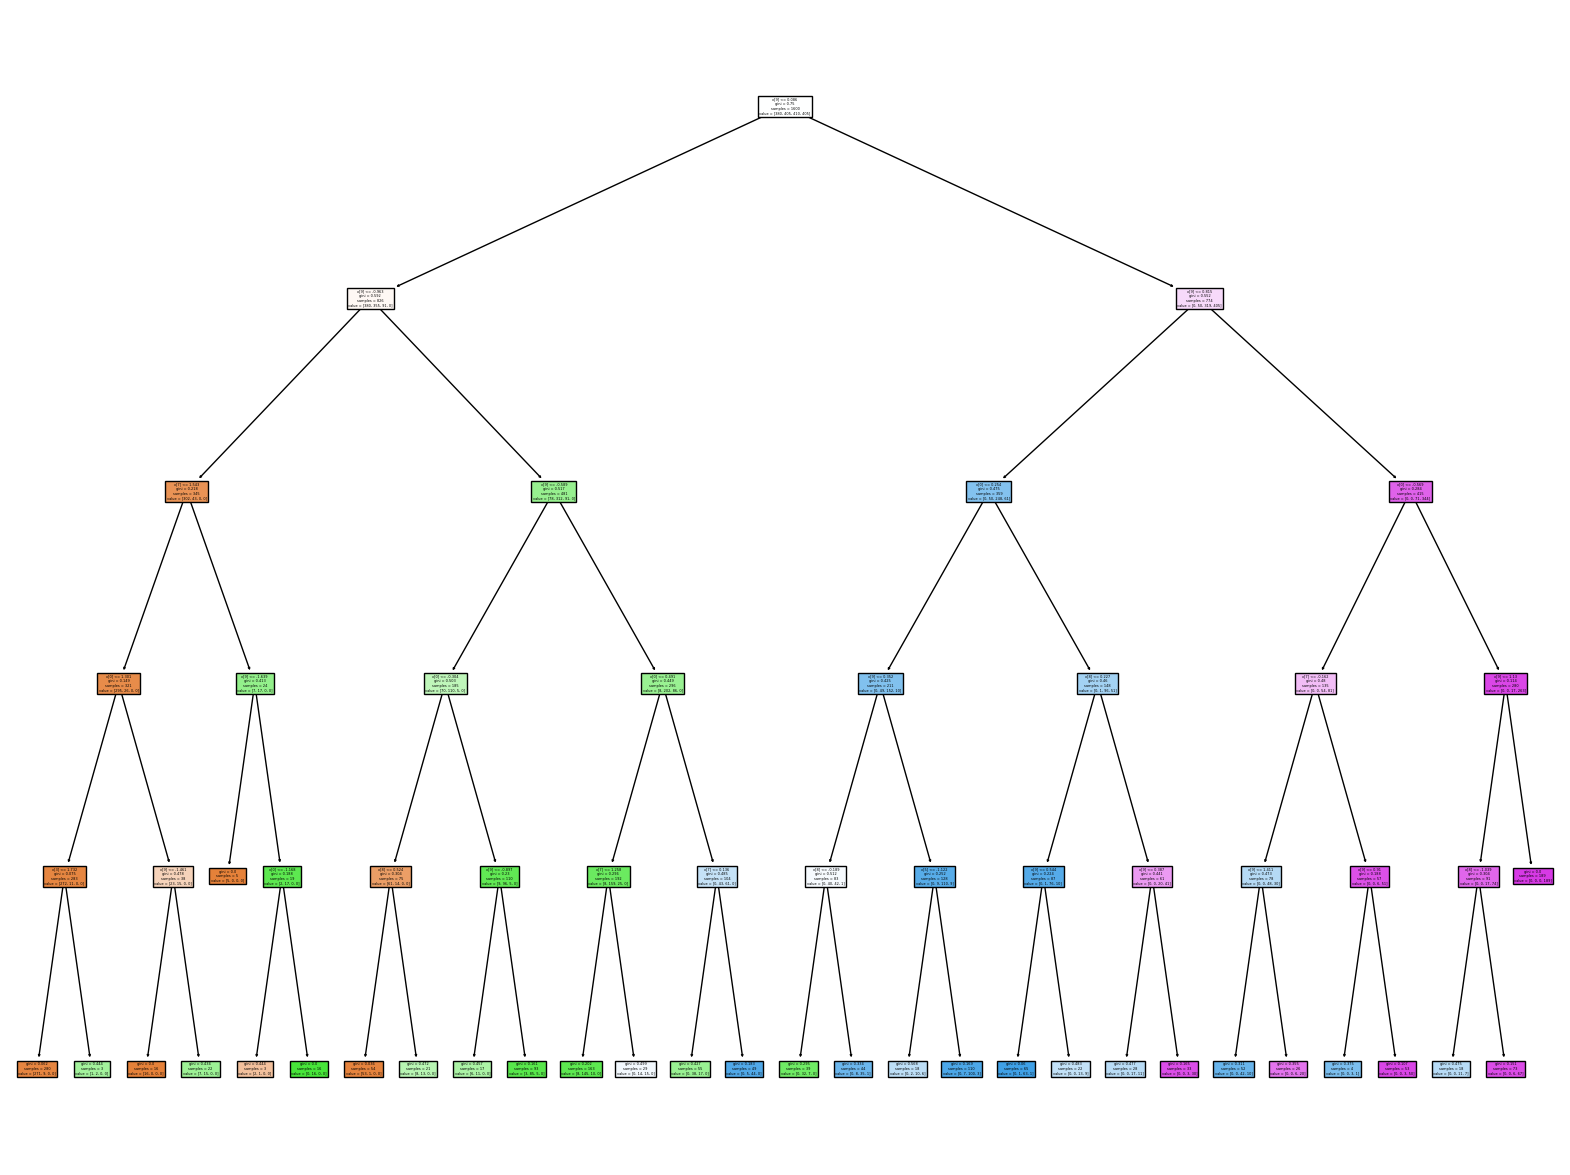

In [52]:
dtc=DecisionTreeClassifier(max_depth =5).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_val, y_val)))

plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.82      0.87       120
           1       0.72      0.83      0.77        95
           2       0.78      0.81      0.80        90
           3       0.91      0.89      0.90        95

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.84       400



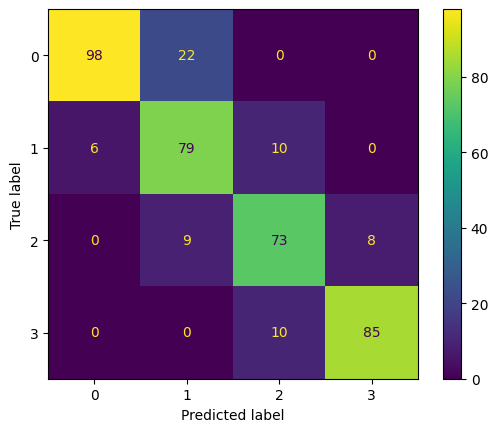

In [53]:
y_preds = dtc.predict(X_val)
evaluate_model(y_val, y_preds)

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.83


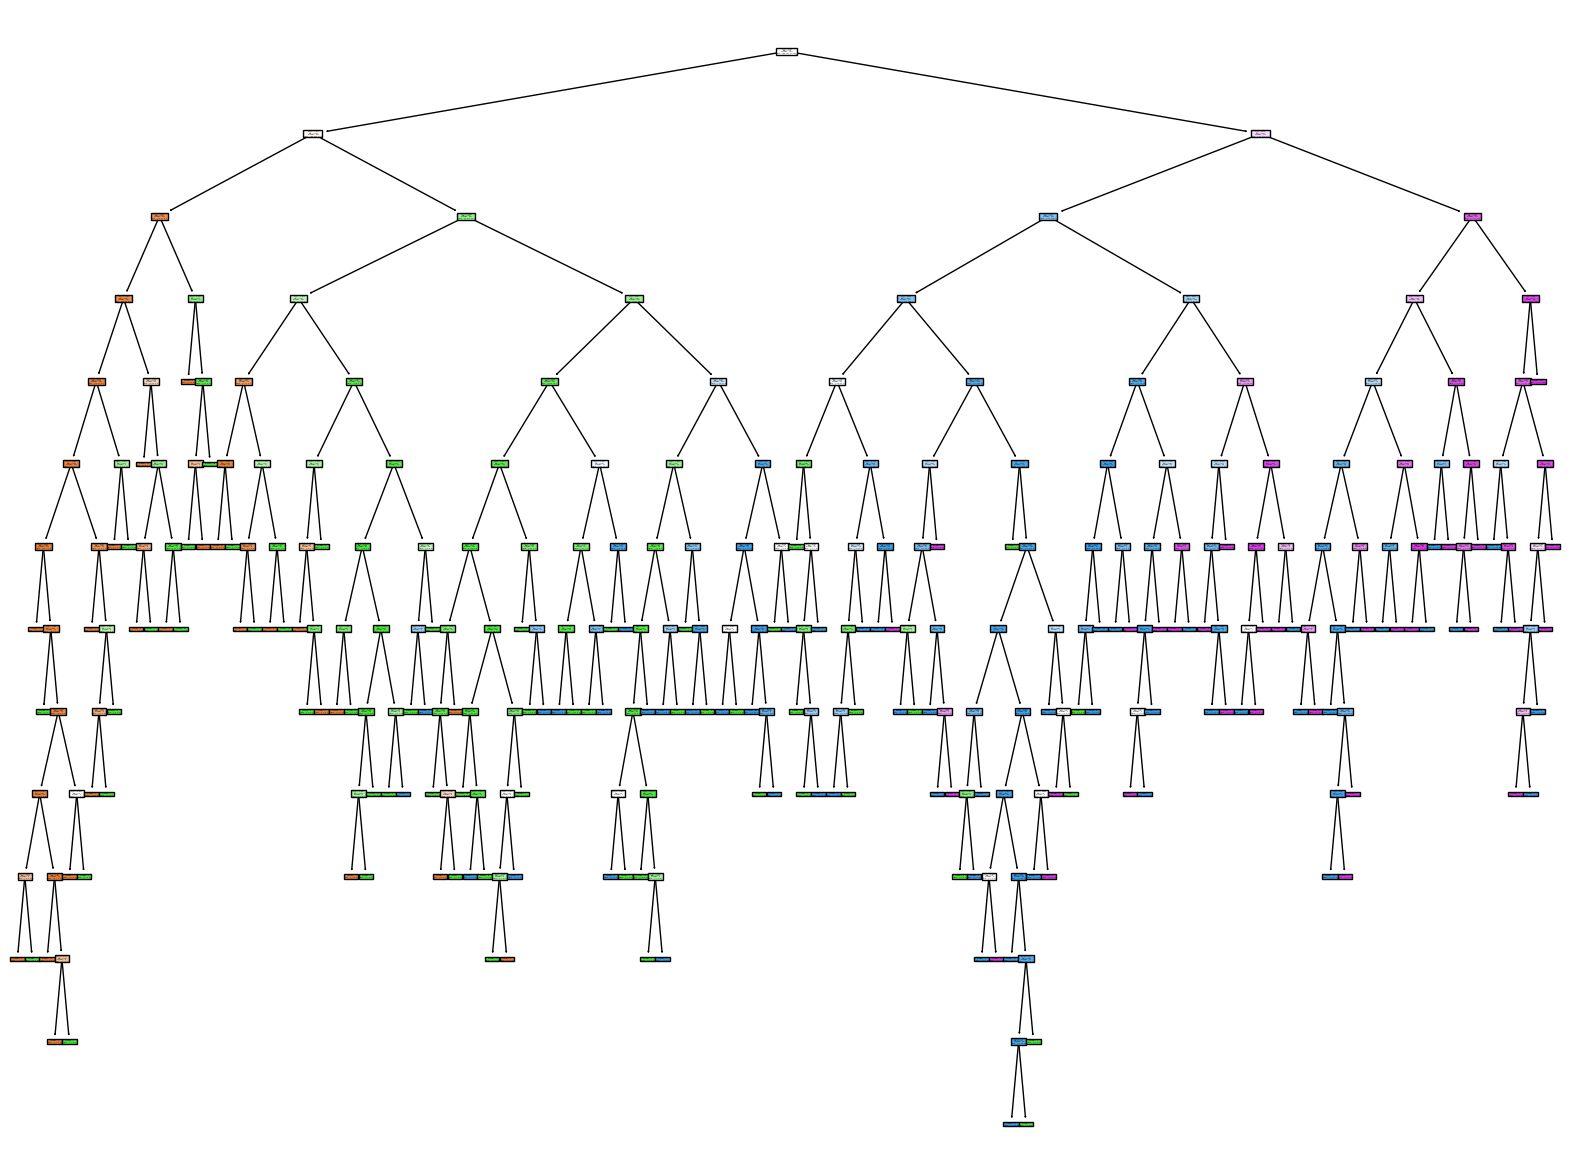

In [54]:
dtc=DecisionTreeClassifier(max_depth =25).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_val, y_val)))

plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       120
           1       0.71      0.76      0.73        95
           2       0.79      0.78      0.78        90
           3       0.89      0.95      0.92        95

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400



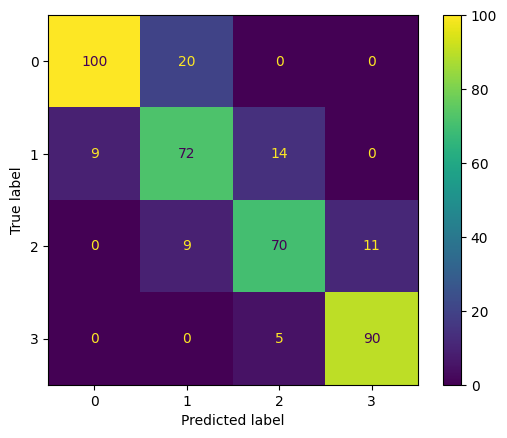

In [55]:
y_preds = dtc.predict(X_val)
evaluate_model(y_val, y_preds)

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.81


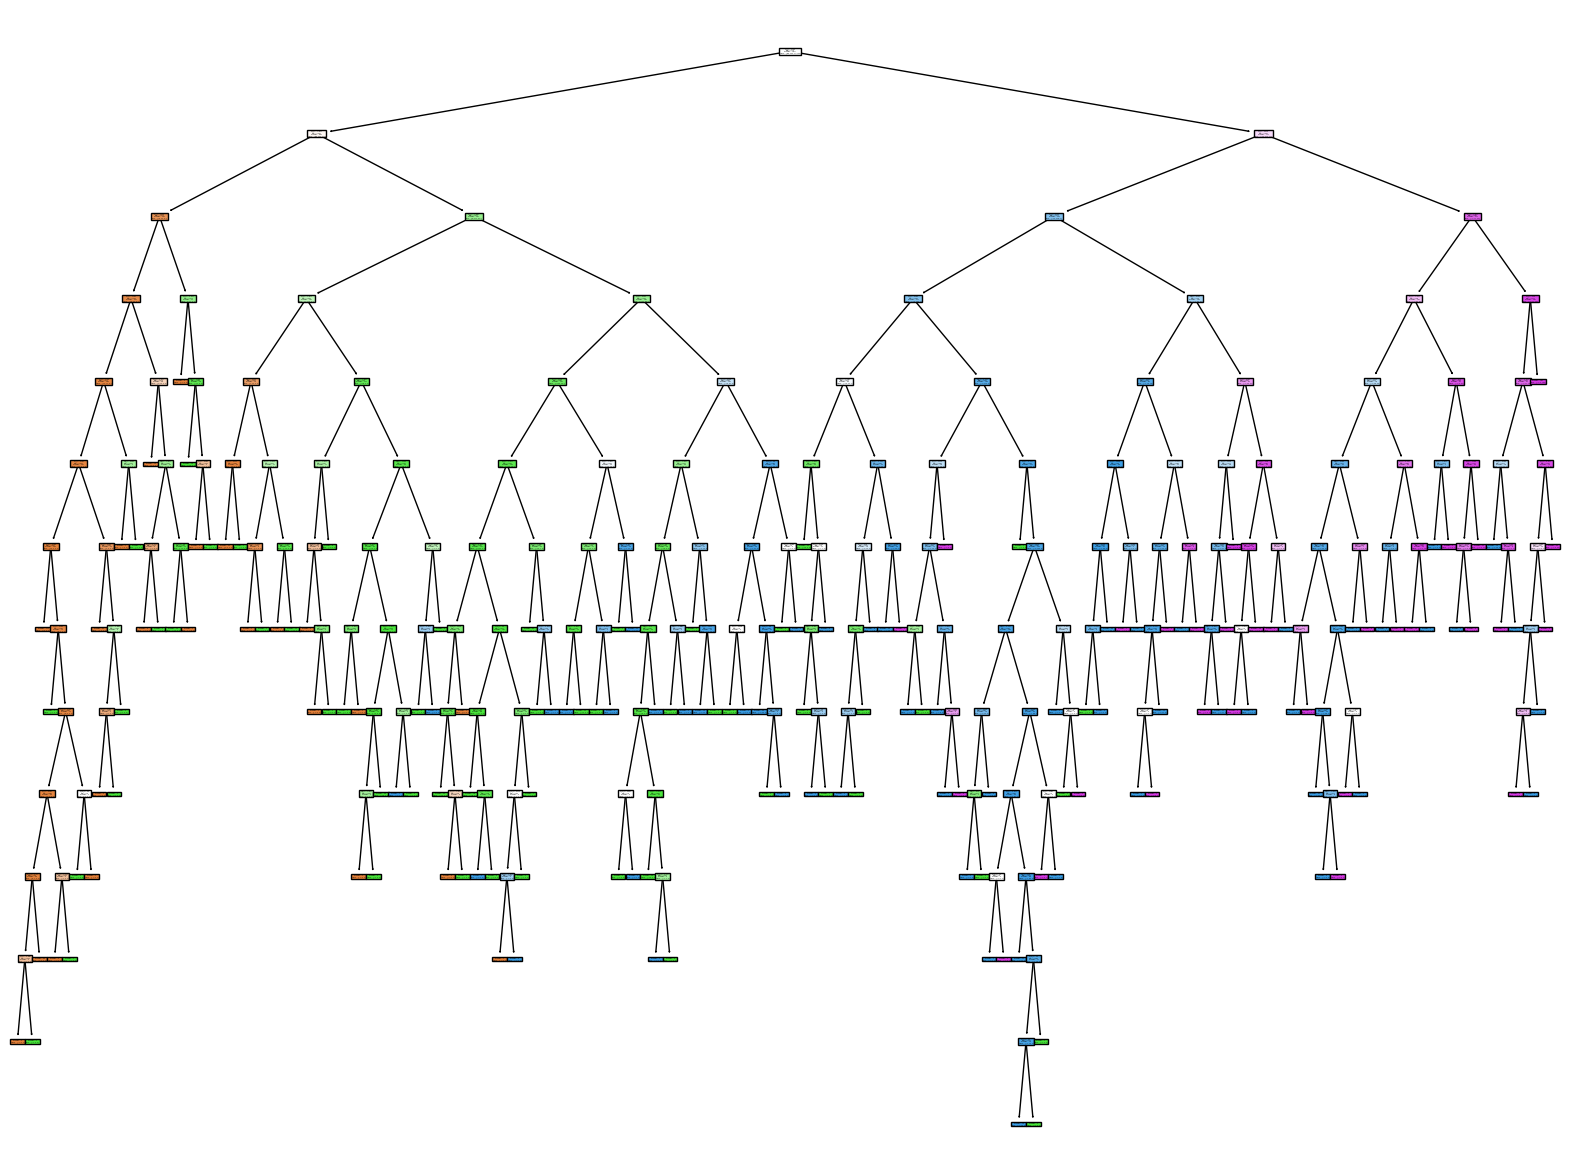

In [56]:
dtc=DecisionTreeClassifier(max_depth =15).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_val, y_val)))

plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       120
           1       0.71      0.74      0.73        95
           2       0.75      0.76      0.75        90
           3       0.86      0.92      0.89        95

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



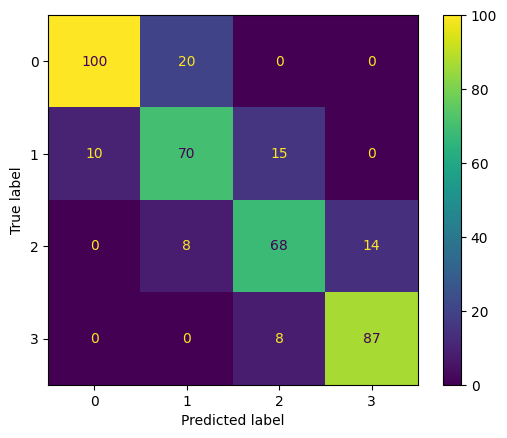

In [57]:
y_preds = dtc.predict(X_val)
evaluate_model(y_val, y_preds)

### 2. Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
forest_reg = RandomForestClassifier( max_depth=5, n_estimators=50)
forest_reg.fit(X_train, y_train)


forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Accuracy score (test) ',forest_reg.score(X_val,y_val))

Accuracy score (training) 0.9025
Accuracy score (test)  0.8125


              precision    recall  f1-score   support

           0       0.93      0.81      0.87       120
           1       0.67      0.78      0.72        95
           2       0.75      0.76      0.75        90
           3       0.91      0.91      0.91        95

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.82       400



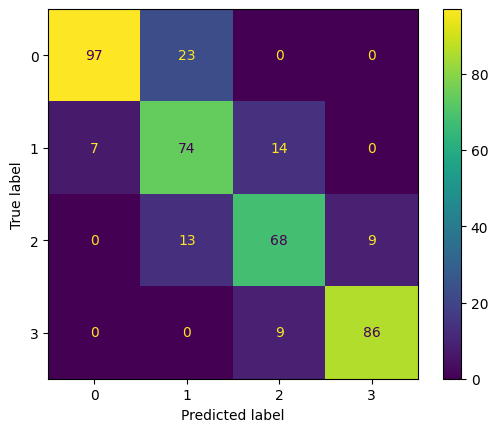

In [60]:
y_preds = forest_reg.predict(X_val)
evaluate_model(y_val, y_preds)

In [61]:
forest_reg = RandomForestClassifier( max_depth=25, n_estimators=75)
forest_reg.fit(X_train, y_train)


forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Accuracy score (test) ',forest_reg.score(X_val,y_val))

Accuracy score (training) 1.0
Accuracy score (test)  0.89


              precision    recall  f1-score   support

           0       0.97      0.93      0.94       120
           1       0.81      0.86      0.84        95
           2       0.86      0.78      0.82        90
           3       0.90      0.98      0.94        95

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.88       400
weighted avg       0.89      0.89      0.89       400



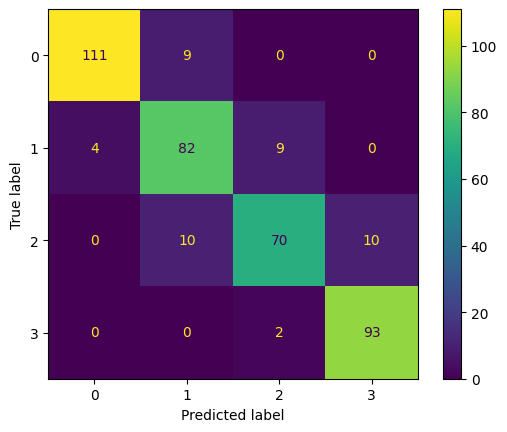

In [62]:
y_preds = forest_reg.predict(X_val)
evaluate_model(y_val, y_preds)

### 3. KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
score_knn = knn.score(X_val,y_val)
print('The accuracy of the K-nearest neighbors Model is',score_knn)

The accuracy of the K-nearest neighbors Model is 0.64


              precision    recall  f1-score   support

           0       0.81      0.76      0.78       120
           1       0.48      0.57      0.52        95
           2       0.48      0.53      0.51        90
           3       0.85      0.66      0.75        95

    accuracy                           0.64       400
   macro avg       0.65      0.63      0.64       400
weighted avg       0.67      0.64      0.65       400



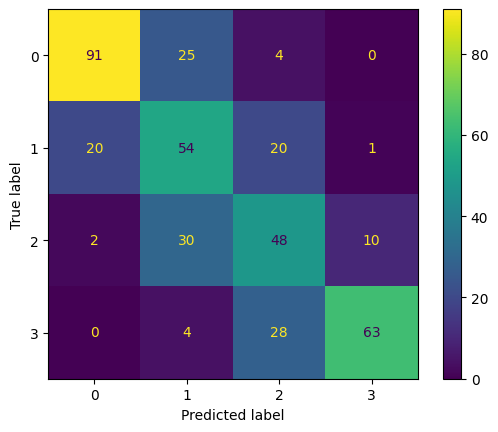

In [65]:
y_preds = knn.predict(X_val)
evaluate_model(y_val, y_preds)

In [66]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
score_knn = knn.score(X_val,y_val)
print('The accuracy of the K-nearest neighbors Model is',score_knn)

The accuracy of the K-nearest neighbors Model is 0.685


              precision    recall  f1-score   support

           0       0.85      0.78      0.81       120
           1       0.55      0.62      0.58        95
           2       0.52      0.63      0.57        90
           3       0.88      0.68      0.77        95

    accuracy                           0.69       400
   macro avg       0.70      0.68      0.68       400
weighted avg       0.71      0.69      0.69       400



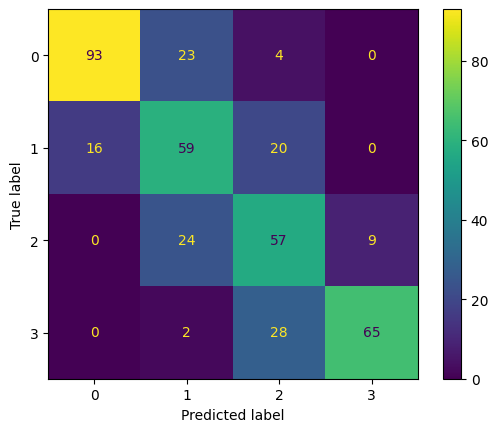

In [67]:
y_preds = knn.predict(X_val)
evaluate_model(y_val, y_preds)

In [68]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
score_knn = knn.score(X_val,y_val)
print('The accuracy of the K-nearest neighbors Model is',score_knn)

The accuracy of the K-nearest neighbors Model is 0.6775


              precision    recall  f1-score   support

           0       0.88      0.76      0.81       120
           1       0.53      0.60      0.56        95
           2       0.50      0.61      0.55        90
           3       0.86      0.72      0.78        95

    accuracy                           0.68       400
   macro avg       0.69      0.67      0.68       400
weighted avg       0.71      0.68      0.69       400



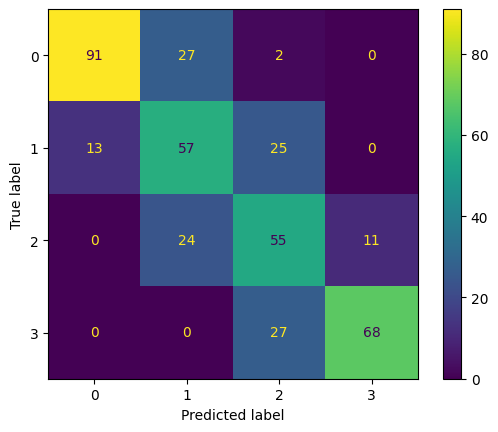

In [69]:
y_preds = knn.predict(X_val)
evaluate_model(y_val, y_preds)

### 4. Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)

log_clf.fit(X_train,y_train)


print('Accuracy of Logistic regression classifier on train set:' , log_clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:' , log_clf.score(X_val, y_val))

Accuracy of Logistic regression classifier on train set: 0.85375
Accuracy of Logistic regression classifier on test set: 0.84


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       120
           1       0.74      0.68      0.71        95
           2       0.69      0.64      0.67        90
           3       0.90      0.99      0.94        95

    accuracy                           0.84       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.83      0.84      0.84       400



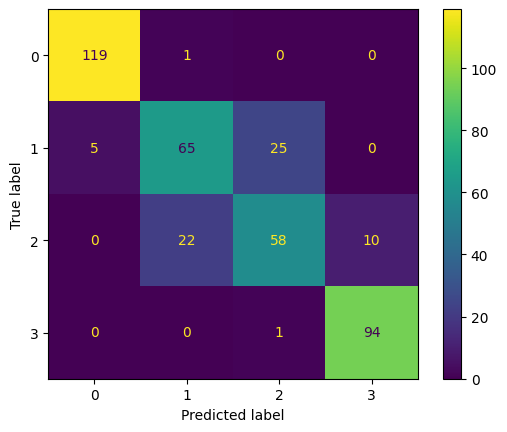

In [72]:
y_preds = log_clf.predict(X_val)
evaluate_model(y_val, y_preds)

In [73]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=5.0)

log_clf.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on train set:', log_clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:', log_clf.score(X_val, y_val))


Accuracy of Logistic regression classifier on train set: 0.8675
Accuracy of Logistic regression classifier on test set: 0.8525


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       0.75      0.72      0.73        95
           2       0.70      0.67      0.68        90
           3       0.92      0.99      0.95        95

    accuracy                           0.85       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.85      0.85       400



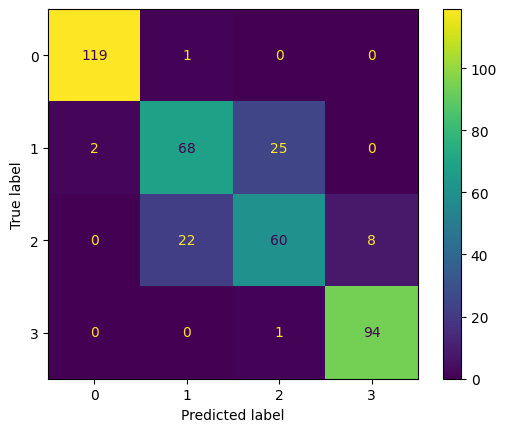

In [74]:
y_preds = log_clf.predict(X_val)
evaluate_model(y_val, y_preds)

In [75]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=15.0)

log_clf.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on train set:', log_clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:', log_clf.score(X_val, y_val))


Accuracy of Logistic regression classifier on train set: 0.874375
Accuracy of Logistic regression classifier on test set: 0.8575


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       0.75      0.72      0.73        95
           2       0.70      0.69      0.70        90
           3       0.94      0.99      0.96        95

    accuracy                           0.86       400
   macro avg       0.84      0.85      0.84       400
weighted avg       0.85      0.86      0.86       400



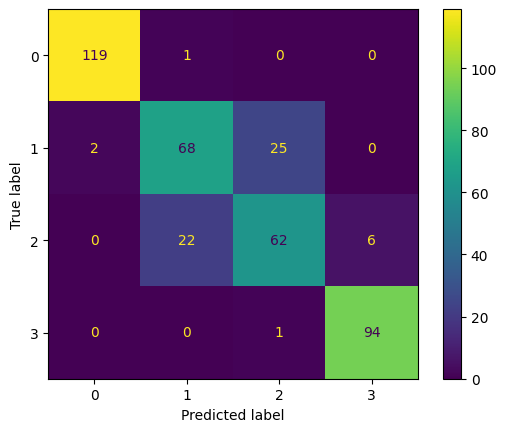

In [76]:
y_preds = log_clf.predict(X_val)
evaluate_model(y_val, y_preds)

In [77]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=25.0)

log_clf.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on train set:', log_clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:', log_clf.score(X_val, y_val))


Accuracy of Logistic regression classifier on train set: 0.876875
Accuracy of Logistic regression classifier on test set: 0.8575


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       0.75      0.72      0.73        95
           2       0.70      0.69      0.70        90
           3       0.94      0.99      0.96        95

    accuracy                           0.86       400
   macro avg       0.84      0.85      0.84       400
weighted avg       0.85      0.86      0.86       400



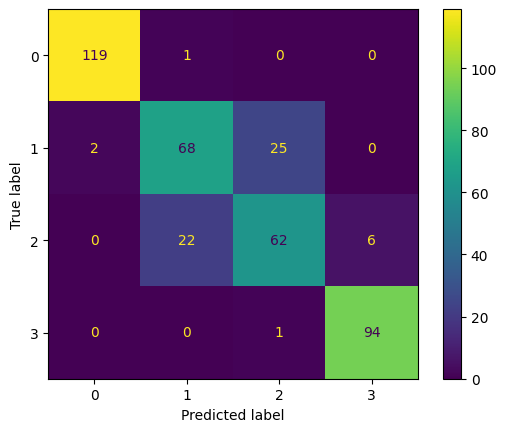

In [78]:
y_preds = log_clf.predict(X_val)
evaluate_model(y_val, y_preds)

### 5. SVC

In [79]:
from sklearn.svm import SVC

In [80]:
C = 1.0
np.random.seed(42)

clfc = SVC(C=C,kernel = 'linear',gamma =2.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(C)
title = 'Linear SVC, C = {:.3f}'.format(C)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(X_val, y_val)))
clfc

Accuracy of RBF-kernel SVC on training set: 0.98
Accuracy of RBF-kernel SVC on test set: 0.95


SVC(gamma=2.5, kernel='linear')

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       120
           1       0.95      0.93      0.94        95
           2       0.93      0.93      0.93        90
           3       0.95      0.99      0.97        95

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.96      0.95      0.95       400



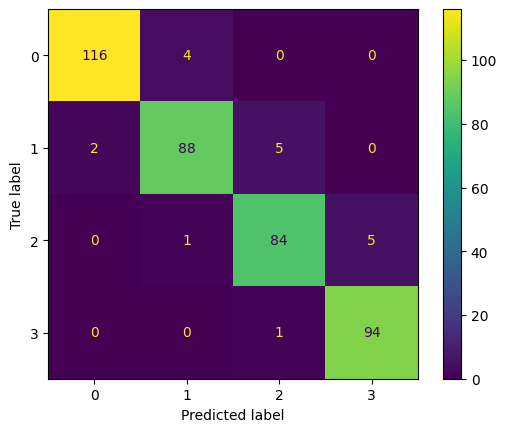

In [81]:
y_preds = clfc.predict(X_val)
evaluate_model(y_val, y_preds)

In [82]:
C = 5.0
np.random.seed(42)

clfc = SVC(C=C,kernel = 'linear',gamma =1.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(C)
title = 'Linear SVC, C = {:.3f}'.format(C)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(X_val, y_val)))
clfc

Accuracy of RBF-kernel SVC on training set: 0.98
Accuracy of RBF-kernel SVC on test set: 0.97


SVC(C=5.0, gamma=1.5, kernel='linear')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       0.97      0.95      0.96        95
           2       0.94      0.93      0.94        90
           3       0.96      1.00      0.98        95

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



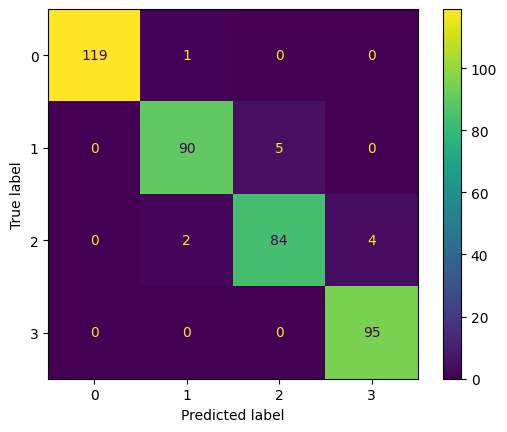

In [83]:
y_preds = clfc.predict(X_val)
evaluate_model(y_val, y_preds)

In [84]:
C = 20.0
np.random.seed(42)

clfc = SVC(C=C,kernel = 'linear',gamma =0.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(C)
title = 'Linear SVC, C = {:.3f}'.format(C)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(X_val, y_val)))
clfc

Accuracy of RBF-kernel SVC on training set: 0.99
Accuracy of RBF-kernel SVC on test set: 0.97


SVC(C=20.0, gamma=0.5, kernel='linear')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       0.97      0.96      0.96        95
           2       0.93      0.93      0.93        90
           3       0.96      0.98      0.97        95

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



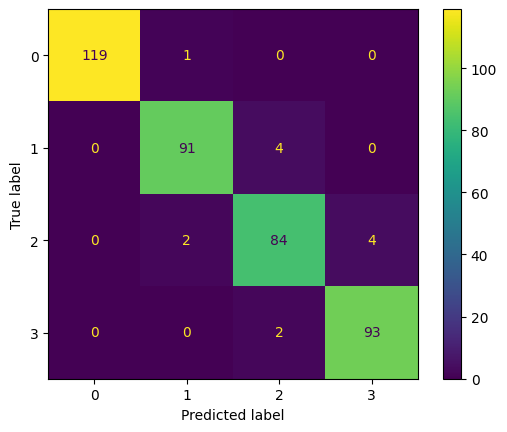

In [85]:
y_preds = clfc.predict(X_val)
evaluate_model(y_val, y_preds)

Conclution: the Support Vector Machine (SVM) achieved the most promising results. I will now focus on further optimizing it with two approaches:

* Hyperparameter Tuning: I will first feed the data directly into the model and utilize randomized search followed by grid search to identify the best hyperparameter configuration.
* Feature Engineering: After hyperparameter tuning, I will explore feature engineering techniques to potentially improve performance further.

### Hyperparameter Tuning for RandomizedSearchCV

In [86]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from time import time

In [87]:
# Define SVM parameters
svm_parameters = {
    'C': np.logspace(-2, 2, 500),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': np.logspace(-3, 3, 500),
    'degree': [2, 3, 4, 5, 6, 7, 8],
    "probability": [True]
}

# Define RandomizedSearchCV
random_svm = SVC()
clf = RandomizedSearchCV(random_svm, svm_parameters, random_state=21, refit=True, cv=5, verbose=0, n_iter=200)

# Start time counter
start_time = time()

# Perform hyperparameter search
search = clf.fit(X_train, y_train)

end_time = time()

# Calculate elapsed time
elapsed_time = end_time - start_time
elapsed_time = elapsed_time/60

# Print best parameters and elapsed time
print(f"Best Parameters: {search.best_params_}")
print(f"Elapsed Time: {elapsed_time:.2f} minutes")


Best Parameters: {'probability': True, 'kernel': 'linear', 'gamma': 0.18218853434651672, 'degree': 7, 'C': 50.51342468816761}
Elapsed Time: 10.05 minutes


In [88]:
clf.best_score_

0.9650000000000001

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       0.97      0.96      0.96        95
           2       0.93      0.91      0.92        90
           3       0.94      0.98      0.96        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



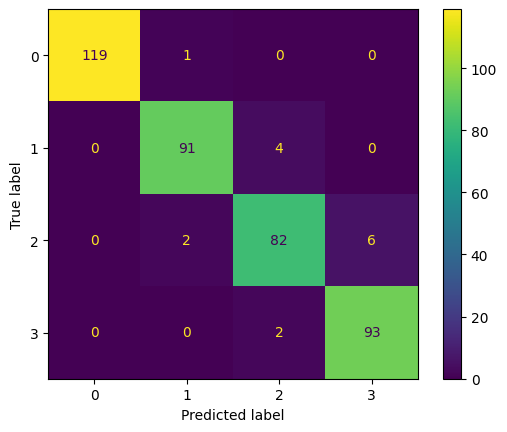

In [89]:
y_preds = clf.predict(X_val)
evaluate_model(y_val, y_preds)

In [90]:
# Define SVM parameters
svm_parameters = {
    'C': np.logspace(1.6, 2, 500),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': np.logspace(-2,0,500),
    'degree': [4, 5, 6, 7, 8, 9, 10],
    "probability": [True]
}

# Define RandomizedSearchCV
random_svm = SVC()
clf = RandomizedSearchCV(random_svm, svm_parameters, random_state=21, refit=True, cv=5, verbose=0, n_iter=200)

# Start time counter
start_time = time()

# Perform hyperparameter search
search = clf.fit(X_train, y_train)

end_time = time()

# Calculate elapsed time
elapsed_time = end_time - start_time
elapsed_time = elapsed_time/60

# Print best parameters and elapsed time
print(f"Best Parameters: {search.best_params_}")
print(f"Elapsed Time: {elapsed_time:.2f} minutes")


Best Parameters: {'probability': True, 'kernel': 'linear', 'gamma': 0.041422324724838956, 'degree': 9, 'C': 46.83182499271134}
Elapsed Time: 15.68 minutes


In [91]:
clf.best_score_

0.9662500000000002

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       0.97      0.96      0.96        95
           2       0.93      0.91      0.92        90
           3       0.94      0.98      0.96        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



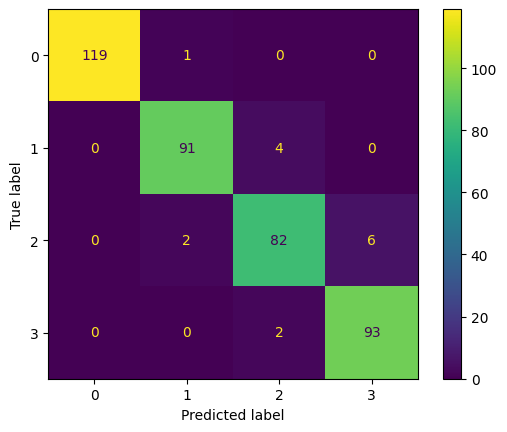

In [92]:
y_preds = clf.predict(X_val)
evaluate_model(y_val, y_preds)

### Hyperparameter Tuning for Grid Search

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
grid_params = {
    'C': np.logspace(1.6, 1.8, 10),
    'kernel': ['linear'],
    'gamma': np.logspace(-1.5, -1, 10),
    'degree': [5,6,7,8,9,10],
    "probability": [True]
}


grid_clf = GridSearchCV(SVC(), grid_params, cv = 3, scoring='accuracy',verbose=3)

# Start time counter
start_time = time()

grid_clf.fit(X_train, y_train)

end_time = time()

# Calculate elapsed time
elapsed_time = end_time - start_time
elapsed_time = elapsed_time/60

# Print best parameters and elapsed time
print(f"Best Parameters: {search.best_params_}")
print(f"Elapsed Time: {elapsed_time:.2f} minutes")

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
[CV 1/3] END C=39.810717055349734, degree=5, gamma=0.03162277660168379, kernel=linear, probability=True;, score=0.966 total time=   1.0s
[CV 2/3] END C=39.810717055349734, degree=5, gamma=0.03162277660168379, kernel=linear, probability=True;, score=0.942 total time=   0.6s
[CV 3/3] END C=39.810717055349734, degree=5, gamma=0.03162277660168379, kernel=linear, probability=True;, score=0.951 total time=   0.6s
[CV 1/3] END C=39.810717055349734, degree=5, gamma=0.03593813663804628, kernel=linear, probability=True;, score=0.966 total time=   0.9s
[CV 2/3] END C=39.810717055349734, degree=5, gamma=0.03593813663804628, kernel=linear, probability=True;, score=0.942 total time=   0.6s
[CV 3/3] END C=39.810717055349734, degree=5, gamma=0.03593813663804628, kernel=linear, probability=True;, score=0.951 total time=   0.5s
[CV 1/3] END C=39.810717055349734, degree=5, gamma=0.04084238652674522, kernel=linear, probability=True;, score=0.

In [95]:
grid_clf.best_score_

0.9549929380019817

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       0.97      0.96      0.96        95
           2       0.93      0.91      0.92        90
           3       0.94      0.98      0.96        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



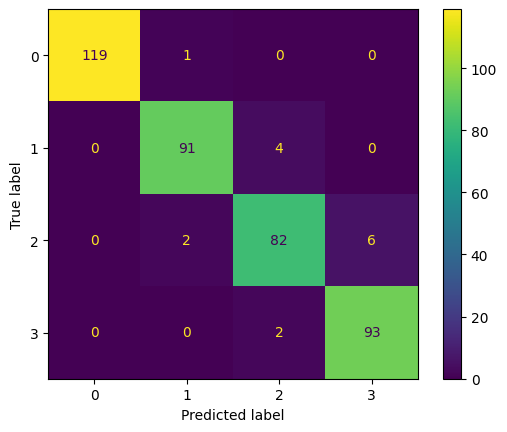

In [96]:
y_preds = grid_clf.predict(X_val)
evaluate_model(y_val, y_preds)

# **Adding one features (camera resultion)**
Create new features based on existing ones.  

camera_res (fc * pc)


In [233]:
!gdown https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/edit#gid=1607079722 -O train.xlsx

df = pd.read_excel("train.xlsx")
df.head()

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:44: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I
  warnings.warn(
Downloading...
From (original): https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/edit#gid=1607079722
From (redirected): https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/export?format=xlsx
To: /content/train.xlsx
174kB [00:00, 56.0MB/s]


battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0     1            1  
1          7        1             1     0            2  
2          9        1             1     0            2  
3         11        1             0     0            2  
4         15        1             1     0            1  

[5 rows x 21 columns]

In [234]:
import pandas as pd

# Calculate camera resoltion
df['camera_res'] = df['fc'] * df['pc']


In [235]:
df.head()

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_width     ram  sc_h  sc_w  talk_time  \
0    0.6      188.0      2.0  ...     756.0  2549.0   9.0   7.0         19   
1    0.7      136.0      3.0  ...    1988.0  2631.0  17.0   3.0          7   
2    0.9      145.0      5.0  ...    1716.0  2603.0  11.0   2.0          9   
3    0.8      131.0      6.0  ...    1786.0  2769.0  16.0   8.0         11   
4    0.6      141.0      2.0  ...    1212.0  1411.0   8.0   2.0         15   

   three_g  touch_screen  wifi  price_range  camera_res  
0        0             0     1            1         2.0  
1        1             1     0            2         0.0  
2        1             1     0            2        12.0  
3        1             0     0            2         0.0  
4        1             1     0            1       182.0  

[5 rows x 22 columns]

In [236]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  1995.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.310276   
std       439.418206     0.5001     0.816004     0.500035     4.335766   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  1995.000000  1995.000000  1995.000000  1996.000000  1996.000000  ...   
mean      0.521303    32.048120     0.502256   140.266533     4.518036  ...   
std       0.499671    18.146476     0.288530    35.384676     2.288946  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

          px_width          ram         sc_h         sc_w    talk_time  \
count  1998.000000  1998.000000  1999.000000  1999.000000  2000.000000   
mean   1251.287788  2124.262262    12.303652     5.766383    11.011000   
std     432.352930  1085.273372     4.212373     4.357400     5.463955   
min     500.000000   256.000000     5.000000     0.000000     2.000000   
25%     874.250000  1206.500000     9.000000     2.000000     6.000000   
50%    1247.000000  2147.500000    12.000000     5.000000    11.000000   
75%    1633.000000  3065.500000    16.000000     9.000000    16.000000   
max    1998.000000  3998.000000    19.000000    18.000000    20.000000   

           three_g  touch_screen         wifi  price_range   camera_res  
count  2000.000000   2000.000000  2000.000000  2000.000000  1993.000000  
mean      0.761500      0.503000     0.507000     1.500000    59.630206  
std       0.426273      0.500116     0.500076     1.118314    76.483036  
min       0.000000      0.000000     0.000000     0.000000     0.000000  
25%       1.000000      0.000000     0.000000     0.750000     2.000000  
50%       1.000000      1.000000     1.000000     1.500000    28.000000  
75%       1.000000      1.000000     1.000000     2.250000    90.000000  
max       1.000000      1.000000     1.000000     3.000000   380.000000  

[8 rows x 22 columns]

In [237]:
from pandas.plotting import scatter_matrix

matrix = df.corr(numeric_only=True)
target = matrix["price_range"].sort_values(ascending=False)

target

price_range      1.000000
ram              0.917119
battery_power    0.200723
px_width         0.166094
px_height        0.148184
int_memory       0.042589
sc_w             0.038777
pc               0.034639
camera_res       0.029344
fc               0.024999
three_g          0.023611
sc_h             0.023300
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.015494
n_cores          0.004598
m_dep           -0.000083
clock_speed     -0.006606
touch_screen    -0.030411
mobile_wt       -0.032457
Name: price_range, dtype: float64

# Modeling

In [238]:
X = df.drop("price_range",axis=1)
y = df["price_range"]

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,
                                               random_state=21)

print(f"Train distrubistion {y_train.value_counts()/len(y_train)}")
print(f"Train distrubistion {y_val.value_counts()/len(y_val)}")


Train distrubistion price_range
2    0.256250
1    0.253125
3    0.253125
0    0.237500
Name: count, dtype: float64
Train distrubistion price_range
0    0.3000
3    0.2375
1    0.2375
2    0.2250
Name: count, dtype: float64


In [239]:
categorical_features = ["blue", "dual_sim", "four_g", "n_cores", "three_g","touch_screen", "wifi"]


numerical_features = [col for col in X.columns if col not in categorical_features]

In [240]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing values with most frequent term
    ('encoder', OneHotEncoder()) # Perform one-hot encoding
])

In [241]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Fill missing values with median
    ('scaler', StandardScaler()) # Perform standard scaling
])

In [242]:
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

In [243]:
# Fit and transform the data using the preprocessor pipeline
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

## Training

### Decision Tree Classifier

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.83


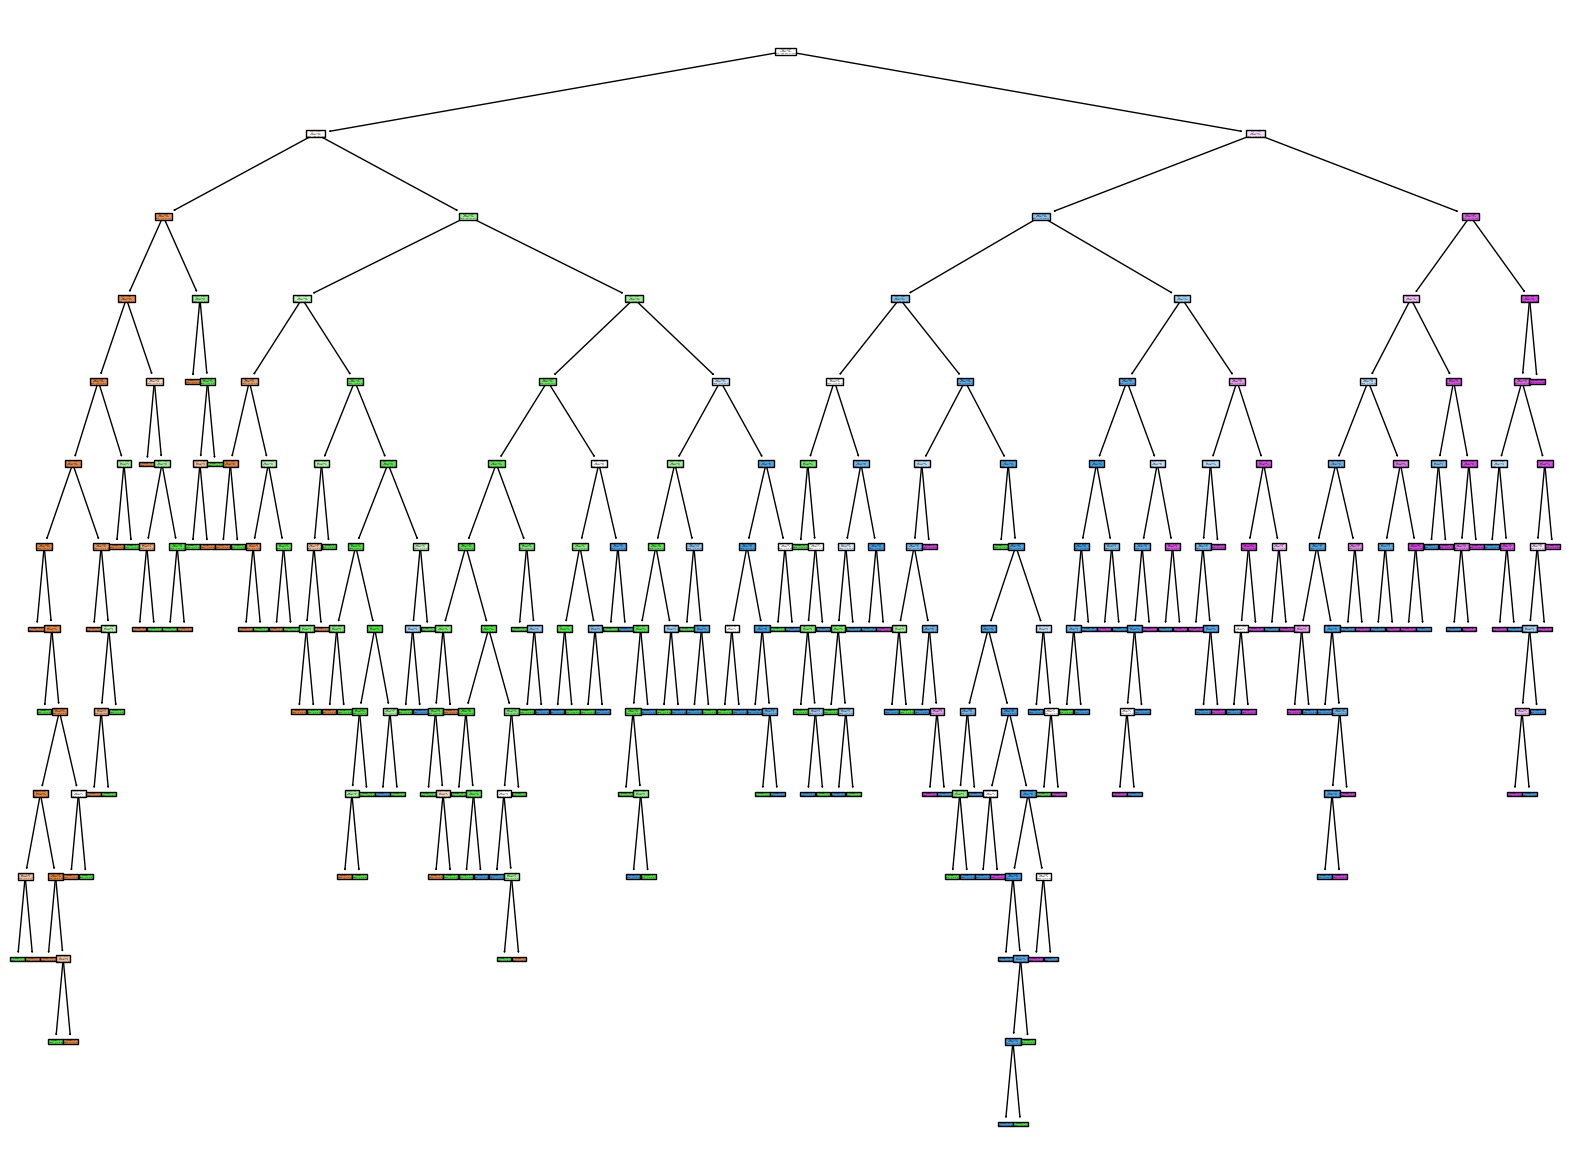

In [108]:
dtc=DecisionTreeClassifier(max_depth =15).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_val, y_val)))

plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       120
           1       0.75      0.75      0.75        95
           2       0.77      0.79      0.78        90
           3       0.88      0.94      0.91        95

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.84       400



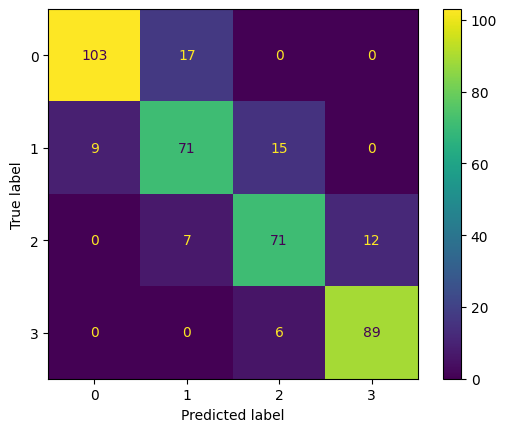

In [109]:
y_preds = dtc.predict(X_val)
evaluate_model(y_val, y_preds)

### Random Forest

In [110]:
forest_reg = RandomForestClassifier( max_depth=5, n_estimators=50)
forest_reg.fit(X_train, y_train)


forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Accuracy score (test) ',forest_reg.score(X_val,y_val))

Accuracy score (training) 0.905625
Accuracy score (test)  0.815


              precision    recall  f1-score   support

           0       0.92      0.86      0.89       120
           1       0.69      0.76      0.72        95
           2       0.77      0.67      0.71        90
           3       0.86      0.96      0.91        95

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.81      0.81       400



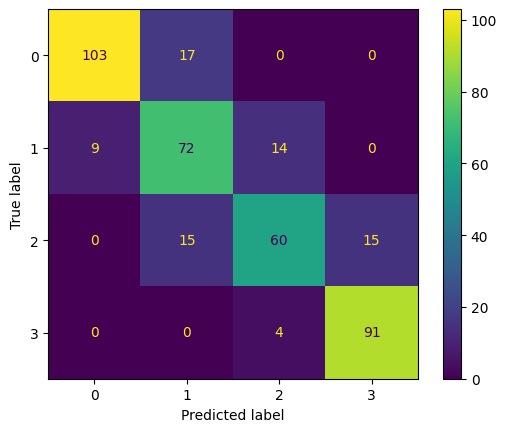

In [111]:
y_preds = forest_reg.predict(X_val)
evaluate_model(y_val, y_preds)

In [112]:
forest_reg = RandomForestClassifier( max_depth=25, n_estimators=75)
forest_reg.fit(X_train, y_train)


forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Accuracy score (test) ',forest_reg.score(X_val,y_val))

Accuracy score (training) 1.0
Accuracy score (test)  0.865


              precision    recall  f1-score   support

           0       0.93      0.92      0.92       120
           1       0.82      0.80      0.81        95
           2       0.79      0.81      0.80        90
           3       0.90      0.92      0.91        95

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.86      0.87       400



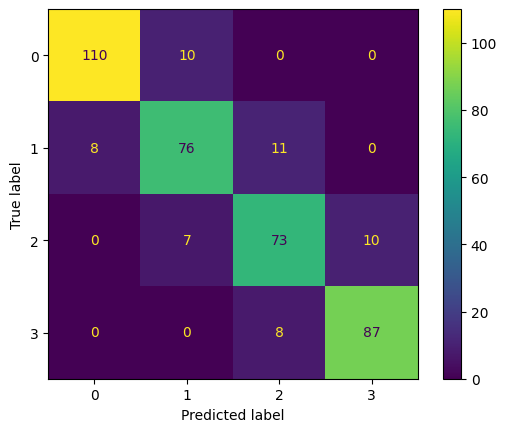

In [113]:
y_preds = forest_reg.predict(X_val)
evaluate_model(y_val, y_preds)

In [114]:
forest_reg = RandomForestClassifier( max_depth=15, n_estimators=50)
forest_reg.fit(X_train, y_train)


forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Accuracy score (test) ',forest_reg.score(X_val,y_val))

Accuracy score (training) 1.0
Accuracy score (test)  0.825


### KNN

In [115]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
score_knn = knn.score(X_val,y_val)
print('The accuracy of the K-nearest neighbors Model is',score_knn)

The accuracy of the K-nearest neighbors Model is 0.6025


              precision    recall  f1-score   support

           0       0.80      0.72      0.76       120
           1       0.44      0.56      0.49        95
           2       0.42      0.48      0.45        90
           3       0.84      0.62      0.72        95

    accuracy                           0.60       400
   macro avg       0.63      0.59      0.60       400
weighted avg       0.64      0.60      0.61       400



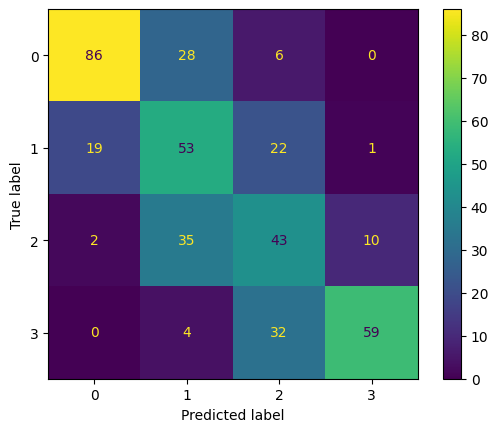

In [116]:
y_preds = knn.predict(X_val)
evaluate_model(y_val, y_preds)

In [117]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
score_knn = knn.score(X_val,y_val)
print('The accuracy of the K-nearest neighbors Model is',score_knn)

The accuracy of the K-nearest neighbors Model is 0.6875


              precision    recall  f1-score   support

           0       0.85      0.77      0.81       120
           1       0.56      0.63      0.59        95
           2       0.53      0.67      0.59        90
           3       0.88      0.66      0.75        95

    accuracy                           0.69       400
   macro avg       0.70      0.68      0.69       400
weighted avg       0.72      0.69      0.70       400



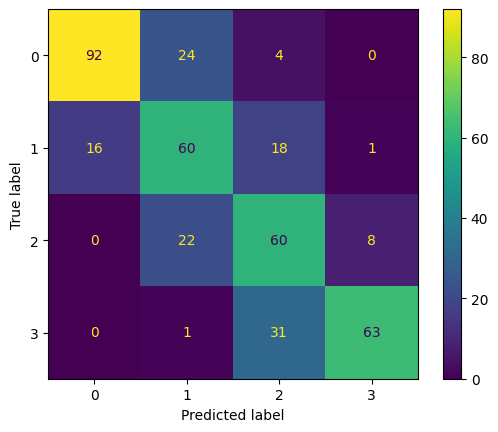

In [118]:
y_preds = knn.predict(X_val)
evaluate_model(y_val, y_preds)

### Logistic Regession

In [119]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)

log_clf.fit(X_train,y_train)


print('Accuracy of Logistic regression classifier on train set:' , log_clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:' , log_clf.score(X_val, y_val))

Accuracy of Logistic regression classifier on train set: 0.855
Accuracy of Logistic regression classifier on test set: 0.8375


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       120
           1       0.74      0.67      0.70        95
           2       0.69      0.66      0.67        90
           3       0.90      0.99      0.94        95

    accuracy                           0.84       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.83      0.84      0.83       400



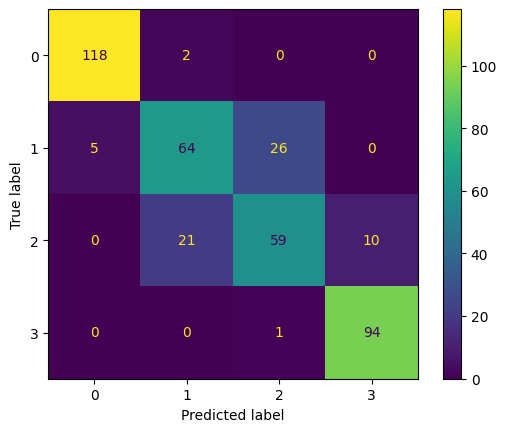

In [120]:
y_preds =  log_clf.predict(X_val)
evaluate_model(y_val, y_preds)

In [121]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=5.0)

log_clf.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on train set:', log_clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:', log_clf.score(X_val, y_val))


Accuracy of Logistic regression classifier on train set: 0.87125
Accuracy of Logistic regression classifier on test set: 0.8475


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       120
           1       0.74      0.69      0.72        95
           2       0.69      0.68      0.69        90
           3       0.92      0.99      0.95        95

    accuracy                           0.85       400
   macro avg       0.83      0.84      0.83       400
weighted avg       0.84      0.85      0.85       400



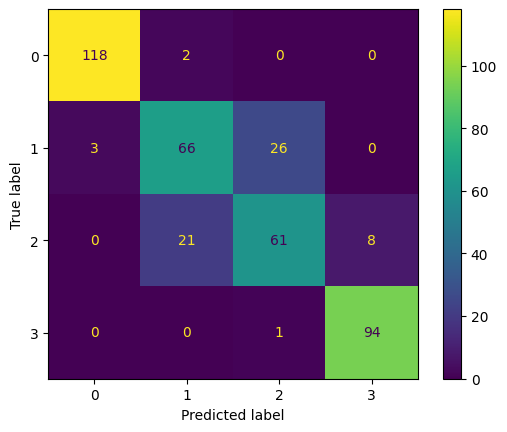

In [122]:
y_preds =  log_clf.predict(X_val)
evaluate_model(y_val, y_preds)

In [123]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=5.0)

log_clf.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on train set:', log_clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:', log_clf.score(X_val, y_val))


Accuracy of Logistic regression classifier on train set: 0.87125
Accuracy of Logistic regression classifier on test set: 0.8475


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       120
           1       0.74      0.69      0.72        95
           2       0.69      0.68      0.69        90
           3       0.92      0.99      0.95        95

    accuracy                           0.85       400
   macro avg       0.83      0.84      0.83       400
weighted avg       0.84      0.85      0.85       400



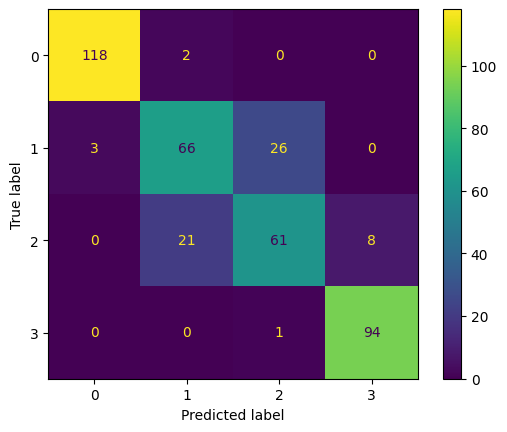

In [124]:
y_preds =  log_clf.predict(X_val)
evaluate_model(y_val, y_preds)

### SVC

In [125]:
C = 1.0
np.random.seed(42)

clfc = SVC(C=C,kernel = 'linear',gamma =2.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(C)
title = 'Linear SVC, C = {:.3f}'.format(C)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(X_val, y_val)))
clfc

Accuracy of RBF-kernel SVC on training set: 0.98
Accuracy of RBF-kernel SVC on test set: 0.96


SVC(gamma=2.5, kernel='linear')

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       120
           1       0.95      0.95      0.95        95
           2       0.94      0.92      0.93        90
           3       0.95      0.99      0.97        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



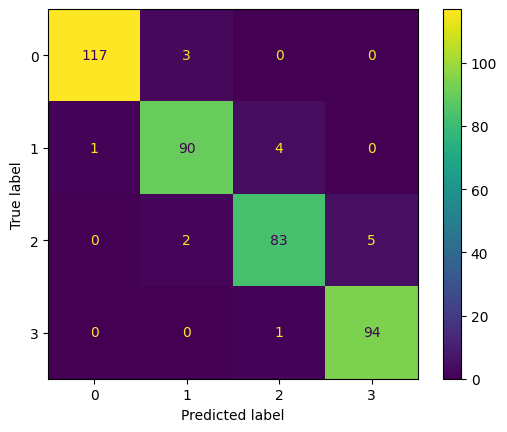

In [126]:
y_preds =  clfc.predict(X_val)
evaluate_model(y_val, y_preds)

In [127]:
C = 5.0
np.random.seed(42)

clfc = SVC(C=C,kernel = 'linear',gamma =1.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(C)
title = 'Linear SVC, C = {:.3f}'.format(C)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(X_val, y_val)))
clfc

Accuracy of RBF-kernel SVC on training set: 0.98
Accuracy of RBF-kernel SVC on test set: 0.96


SVC(C=5.0, gamma=1.5, kernel='linear')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       120
           1       0.97      0.93      0.95        95
           2       0.92      0.93      0.93        90
           3       0.96      0.99      0.97        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



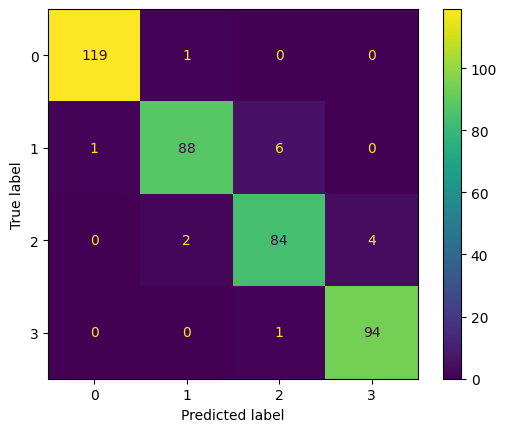

In [128]:
y_preds =  clfc.predict(X_val)
evaluate_model(y_val, y_preds)

In [129]:
C = 20.0
np.random.seed(42)

clfc = SVC(C=C,kernel = 'linear',gamma =0.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(C)
title = 'Linear SVC, C = {:.3f}'.format(C)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(X_val, y_val)))
clfc

Accuracy of RBF-kernel SVC on training set: 0.99
Accuracy of RBF-kernel SVC on test set: 0.96


SVC(C=20.0, gamma=0.5, kernel='linear')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       120
           1       0.97      0.94      0.95        95
           2       0.92      0.93      0.93        90
           3       0.96      0.98      0.97        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



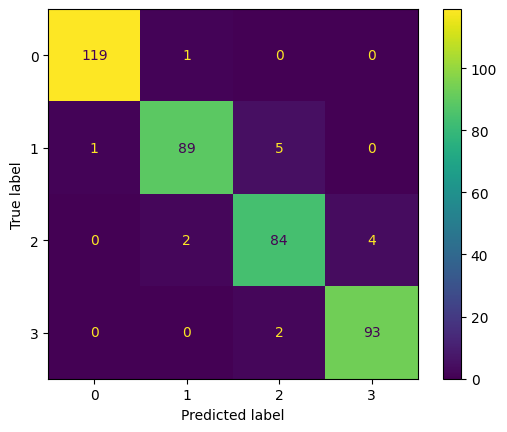

In [130]:
y_preds =  clfc.predict(X_val)
evaluate_model(y_val, y_preds)

### Hyperparameter Tuning for RandomizedSearchCV

In [244]:
# Define SVM parameters
svm_parameters = {
    'C': np.logspace(-2, 2, 500),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': np.logspace(-3, 3, 500),
    'degree': [2, 3, 4, 5, 6, 7, 8],
    "probability": [True]
}

# Define RandomizedSearchCV
random_svm = SVC()
clf = RandomizedSearchCV(random_svm, svm_parameters, random_state=21, refit=True, cv=5, verbose=0, n_iter=200)

# Start time counter
start_time = time()

# Perform hyperparameter search
search = clf.fit(X_train, y_train)

end_time = time()

# Calculate elapsed time
elapsed_time = end_time - start_time
elapsed_time = elapsed_time/60

# Print best parameters and elapsed time
print(f"Best Parameters: {search.best_params_}")
print(f"Elapsed Time: {elapsed_time:.2f} minutes")


Best Parameters: {'probability': True, 'kernel': 'linear', 'gamma': 0.024819302891862554, 'degree': 5, 'C': 4.5009751296080465}
Elapsed Time: 11.84 minutes


In [245]:
clf.best_score_

0.961875

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       120
           1       0.97      0.93      0.95        95
           2       0.92      0.94      0.93        90
           3       0.97      0.99      0.98        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



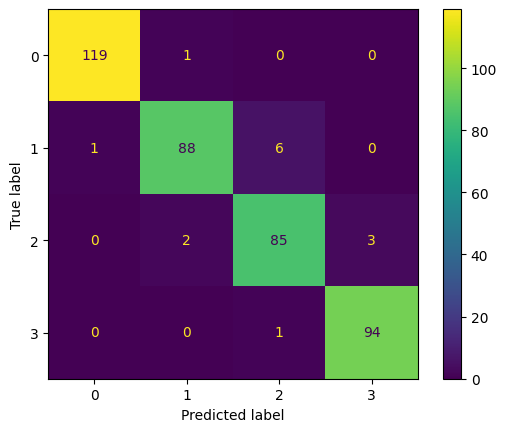

In [246]:
y_preds = clf.predict(X_val)
evaluate_model(y_val, y_preds)

### Hyperparameter Tuning for Grid Search

In [248]:
grid_params = {
    'C': np.logspace(1.6, 1.8, 10),
    'kernel': ['linear'],
    'gamma': np.logspace(-1.5, -1, 10),
    'degree': [5,6,7,8,9,10],
    "probability": [True]
}


grid_clf = GridSearchCV(SVC(), grid_params, cv = 3, scoring='accuracy',verbose=3)

# Start time counter
start_time = time()

grid_clf.fit(X_train, y_train)

end_time = time()

# Calculate elapsed time
elapsed_time = end_time - start_time
elapsed_time = elapsed_time/60

# Print best parameters and elapsed time
print(f"Best Parameters: {search.best_params_}")
print(f"Elapsed Time: {elapsed_time:.2f} minutes")

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
[CV 1/3] END C=39.810717055349734, degree=5, gamma=0.03162277660168379, kernel=linear, probability=True;, score=0.964 total time=   0.7s
[CV 2/3] END C=39.810717055349734, degree=5, gamma=0.03162277660168379, kernel=linear, probability=True;, score=0.940 total time=   0.6s
[CV 3/3] END C=39.810717055349734, degree=5, gamma=0.03162277660168379, kernel=linear, probability=True;, score=0.946 total time=   0.6s
[CV 1/3] END C=39.810717055349734, degree=5, gamma=0.03593813663804628, kernel=linear, probability=True;, score=0.964 total time=   0.6s
[CV 2/3] END C=39.810717055349734, degree=5, gamma=0.03593813663804628, kernel=linear, probability=True;, score=0.940 total time=   0.7s
[CV 3/3] END C=39.810717055349734, degree=5, gamma=0.03593813663804628, kernel=linear, probability=True;, score=0.946 total time=   0.6s
[CV 1/3] END C=39.810717055349734, degree=5, gamma=0.04084238652674522, kernel=linear, probability=True;, score=0.

In [249]:
grid_clf.best_score_

0.9524937168127083

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       120
           1       0.97      0.95      0.96        95
           2       0.93      0.91      0.92        90
           3       0.94      0.98      0.96        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



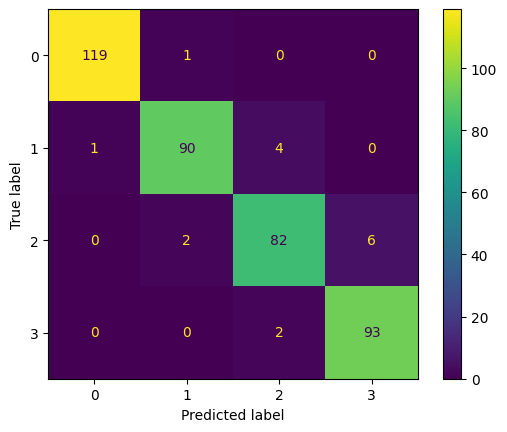

In [250]:
y_preds = grid_clf.predict(X_val)
evaluate_model(y_val, y_preds)

In [252]:
grid_params = {
    'C': np.logspace(1.7, 2, 10),
    'gamma': np.logspace(1.9, 2, 10),
    'degree': [5,6,7,8,9,10]
}

grid_clf = GridSearchCV(SVC(), grid_params, cv = 3, scoring='accuracy',verbose=3)

start_time = time()

grid_clf.fit(X_train, y_train)

end_time = time()

elapsed_time = end_time - start_time
elapsed_time = elapsed_time/60

print(f"Best Parameters: {search.best_params_}")
print(f"Elapsed Time: {elapsed_time:.2f} minutes")

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
[CV 1/3] END C=50.11872336272722, degree=5, gamma=79.43282347242814;, score=0.257 total time=   0.4s
[CV 2/3] END C=50.11872336272722, degree=5, gamma=79.43282347242814;, score=0.255 total time=   0.3s
[CV 3/3] END C=50.11872336272722, degree=5, gamma=79.43282347242814;, score=0.257 total time=   0.3s
[CV 1/3] END C=50.11872336272722, degree=5, gamma=81.4912746902074;, score=0.257 total time=   0.3s
[CV 2/3] END C=50.11872336272722, degree=5, gamma=81.4912746902074;, score=0.255 total time=   0.3s
[CV 3/3] END C=50.11872336272722, degree=5, gamma=81.4912746902074;, score=0.257 total time=   0.3s
[CV 1/3] END C=50.11872336272722, degree=5, gamma=83.6030693651464;, score=0.257 total time=   0.1s
[CV 2/3] END C=50.11872336272722, degree=5, gamma=83.6030693651464;, score=0.255 total time=   0.3s
[CV 3/3] END C=50.11872336272722, degree=5, gamma=83.6030693651464;, score=0.257 total time=   0.3s
[CV 1/3] END C=50.11872336272722,

In [253]:
grid_clf.best_score_

0.2562498096891081

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.00      0.00      0.00        95
           2       0.23      1.00      0.37        90
           3       0.00      0.00      0.00        95

    accuracy                           0.23       400
   macro avg       0.06      0.25      0.09       400
weighted avg       0.05      0.23      0.08       400



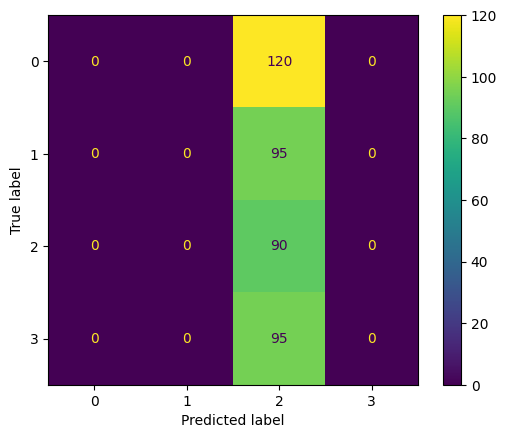

In [255]:
y_preds = grid_clf.predict(X_val)
evaluate_model(y_val, y_preds)

# **Adding one feature (battery_efficiency)**
battery_efficiency (talk_time / battery_power)

In [256]:
!gdown https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/edit#gid=1607079722 -O train.xlsx

df = pd.read_excel("train.xlsx")
df.head()

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:44: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I
  warnings.warn(
Downloading...
From (original): https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/edit#gid=1607079722
From (redirected): https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/export?format=xlsx
To: /content/train.xlsx
174kB [00:00, 69.7MB/s]


battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0     1            1  
1          7        1             1     0            2  
2          9        1             1     0            2  
3         11        1             0     0            2  
4         15        1             1     0            1  

[5 rows x 21 columns]

In [257]:
import pandas as pd

# Calculate battery efficiency (assuming talk_time is in hours)
df['battery_efficiency'] = df['talk_time'] / df['battery_power']


In [258]:
df.head()

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_width     ram  sc_h  sc_w  talk_time  \
0    0.6      188.0      2.0  ...     756.0  2549.0   9.0   7.0         19   
1    0.7      136.0      3.0  ...    1988.0  2631.0  17.0   3.0          7   
2    0.9      145.0      5.0  ...    1716.0  2603.0  11.0   2.0          9   
3    0.8      131.0      6.0  ...    1786.0  2769.0  16.0   8.0         11   
4    0.6      141.0      2.0  ...    1212.0  1411.0   8.0   2.0         15   

   three_g  touch_screen  wifi  price_range  battery_efficiency  
0        0             0     1            1            0.022565  
1        1             1     0            2            0.006856  
2        1             1     0            2            0.015986  
3        1             0     0            2            0.017886  
4        1             1     0            1            0.008237  

[5 rows x 22 columns]

In [259]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  1995.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.310276   
std       439.418206     0.5001     0.816004     0.500035     4.335766   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  1995.000000  1995.000000  1995.000000  1996.000000  1996.000000  ...   
mean      0.521303    32.048120     0.502256   140.266533     4.518036  ...   
std       0.499671    18.146476     0.288530    35.384676     2.288946  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

          px_width          ram         sc_h         sc_w    talk_time  \
count  1998.000000  1998.000000  1999.000000  1999.000000  2000.000000   
mean   1251.287788  2124.262262    12.303652     5.766383    11.011000   
std     432.352930  1085.273372     4.212373     4.357400     5.463955   
min     500.000000   256.000000     5.000000     0.000000     2.000000   
25%     874.250000  1206.500000     9.000000     2.000000     6.000000   
50%    1247.000000  2147.500000    12.000000     5.000000    11.000000   
75%    1633.000000  3065.500000    16.000000     9.000000    16.000000   
max    1998.000000  3998.000000    19.000000    18.000000    20.000000   

           three_g  touch_screen         wifi  price_range  battery_efficiency  
count  2000.000000   2000.000000  2000.000000  2000.000000         2000.000000  
mean      0.761500      0.503000     0.507000     1.500000            0.010211  
std       0.426273      0.500116     0.500076     1.118314            0.006763  
min       0.000000      0.000000     0.000000     0.000000            0.001011  
25%       1.000000      0.000000     0.000000     0.750000            0.005371  
50%       1.000000      1.000000     1.000000     1.500000            0.008979  
75%       1.000000      1.000000     1.000000     2.250000            0.013204  
max       1.000000      1.000000     1.000000     3.000000            0.039841  

[8 rows x 22 columns]

In [260]:
from pandas.plotting import scatter_matrix

matrix = df.corr(numeric_only=True)
target = matrix["price_range"].sort_values(ascending=False)

target

price_range           1.000000
ram                   0.917119
battery_power         0.200723
px_width              0.166094
px_height             0.148184
int_memory            0.042589
sc_w                  0.038777
pc                    0.034639
fc                    0.024999
three_g               0.023611
sc_h                  0.023300
talk_time             0.021859
blue                  0.020573
wifi                  0.018785
dual_sim              0.017444
four_g                0.015494
n_cores               0.004598
m_dep                -0.000083
clock_speed          -0.006606
touch_screen         -0.030411
mobile_wt            -0.032457
battery_efficiency   -0.098104
Name: price_range, dtype: float64

# Modeling

In [261]:
X = df.drop("price_range",axis=1)
y = df["price_range"]

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,
                                               random_state=21)

print(f"Train distrubistion {y_train.value_counts()/len(y_train)}")
print(f"Train distrubistion {y_val.value_counts()/len(y_val)}")


Train distrubistion price_range
2    0.256250
1    0.253125
3    0.253125
0    0.237500
Name: count, dtype: float64
Train distrubistion price_range
0    0.3000
3    0.2375
1    0.2375
2    0.2250
Name: count, dtype: float64


In [262]:
categorical_features = ["blue", "dual_sim", "four_g", "n_cores", "three_g","touch_screen", "wifi"]


numerical_features = [col for col in X.columns if col not in categorical_features]

In [263]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing values with most frequent term
    ('encoder', OneHotEncoder()) # Perform one-hot encoding
])

In [264]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Fill missing values with median
    ('scaler', StandardScaler()) # Perform standard scaling
])

In [265]:
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

In [266]:
# Fit and transform the data using the preprocessor pipeline
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

## Training

### Decision Tree Classifier

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.84


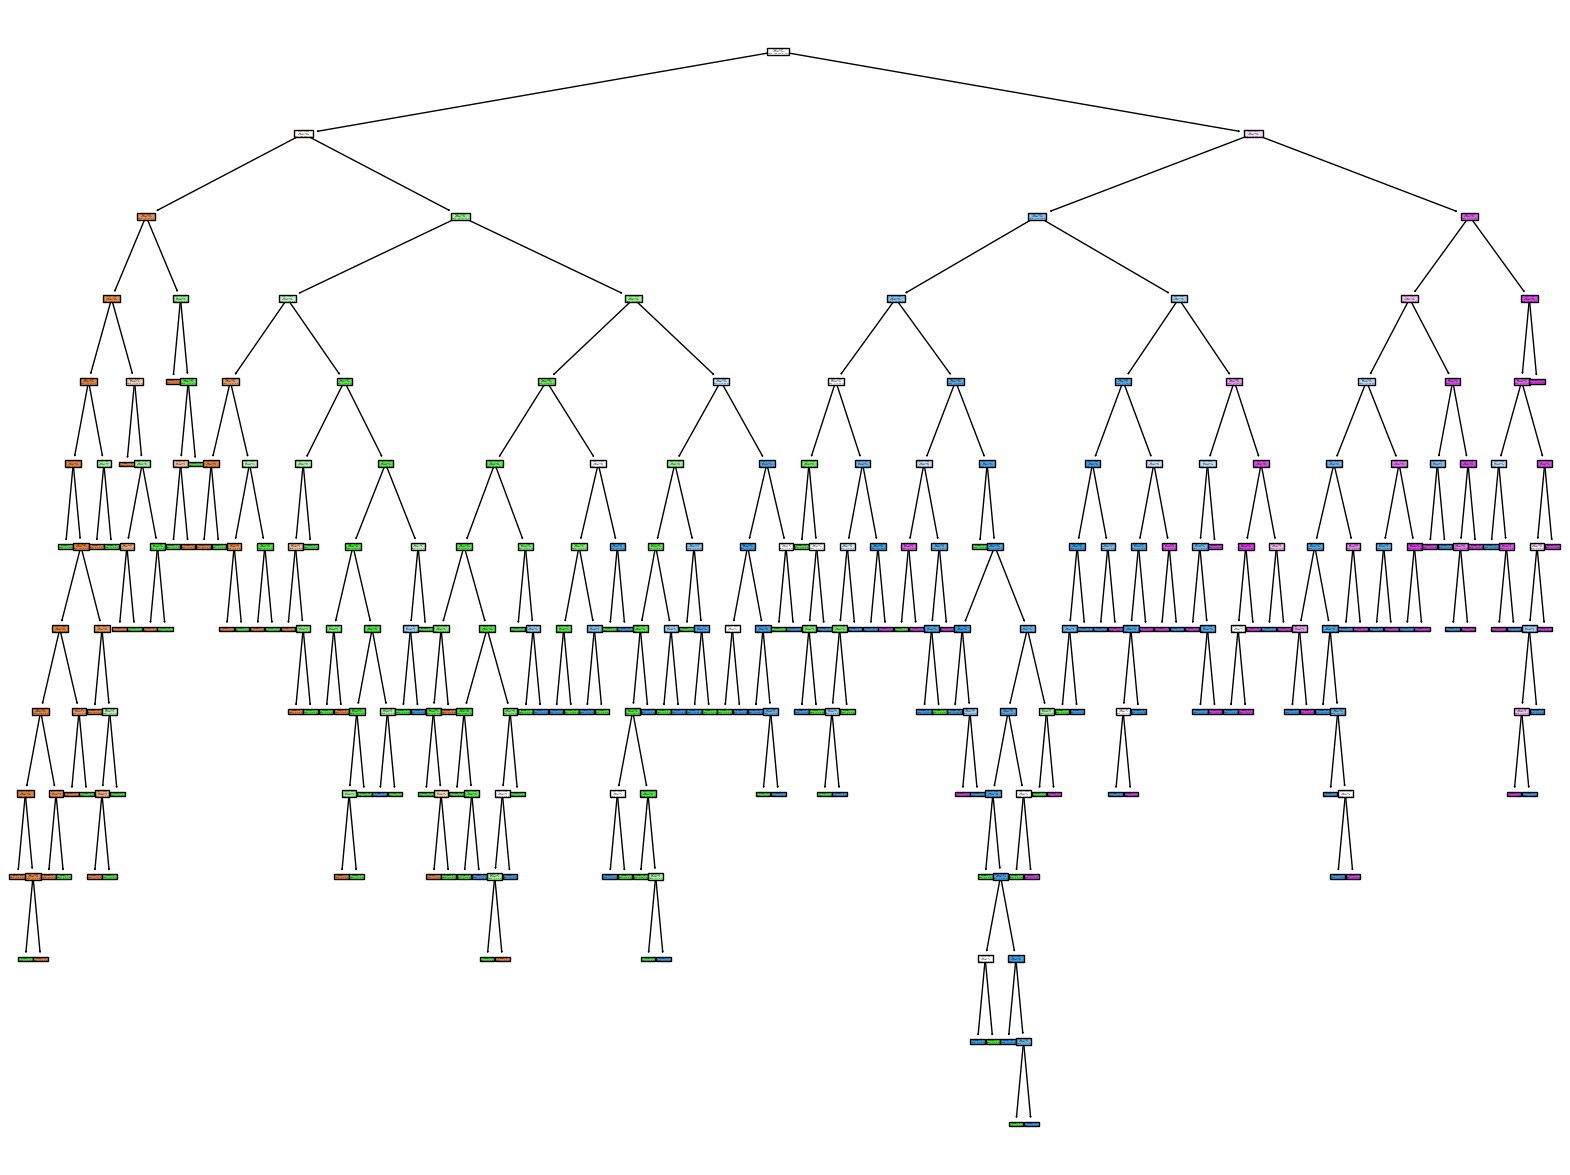

In [142]:
dtc=DecisionTreeClassifier(max_depth =15).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_val, y_val)))

plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       120
           1       0.77      0.79      0.78        95
           2       0.78      0.80      0.79        90
           3       0.88      0.93      0.90        95

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.85       400



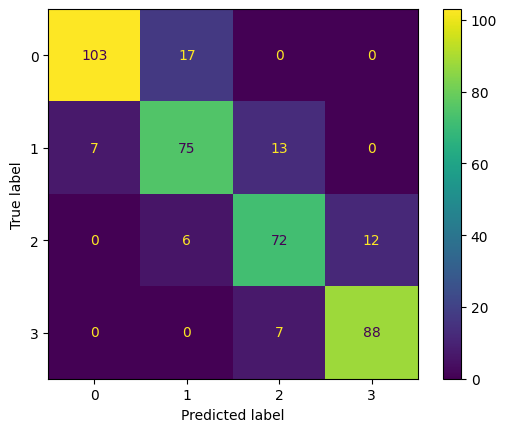

In [143]:
y_preds = dtc.predict(X_val)
evaluate_model(y_val, y_preds)

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.84


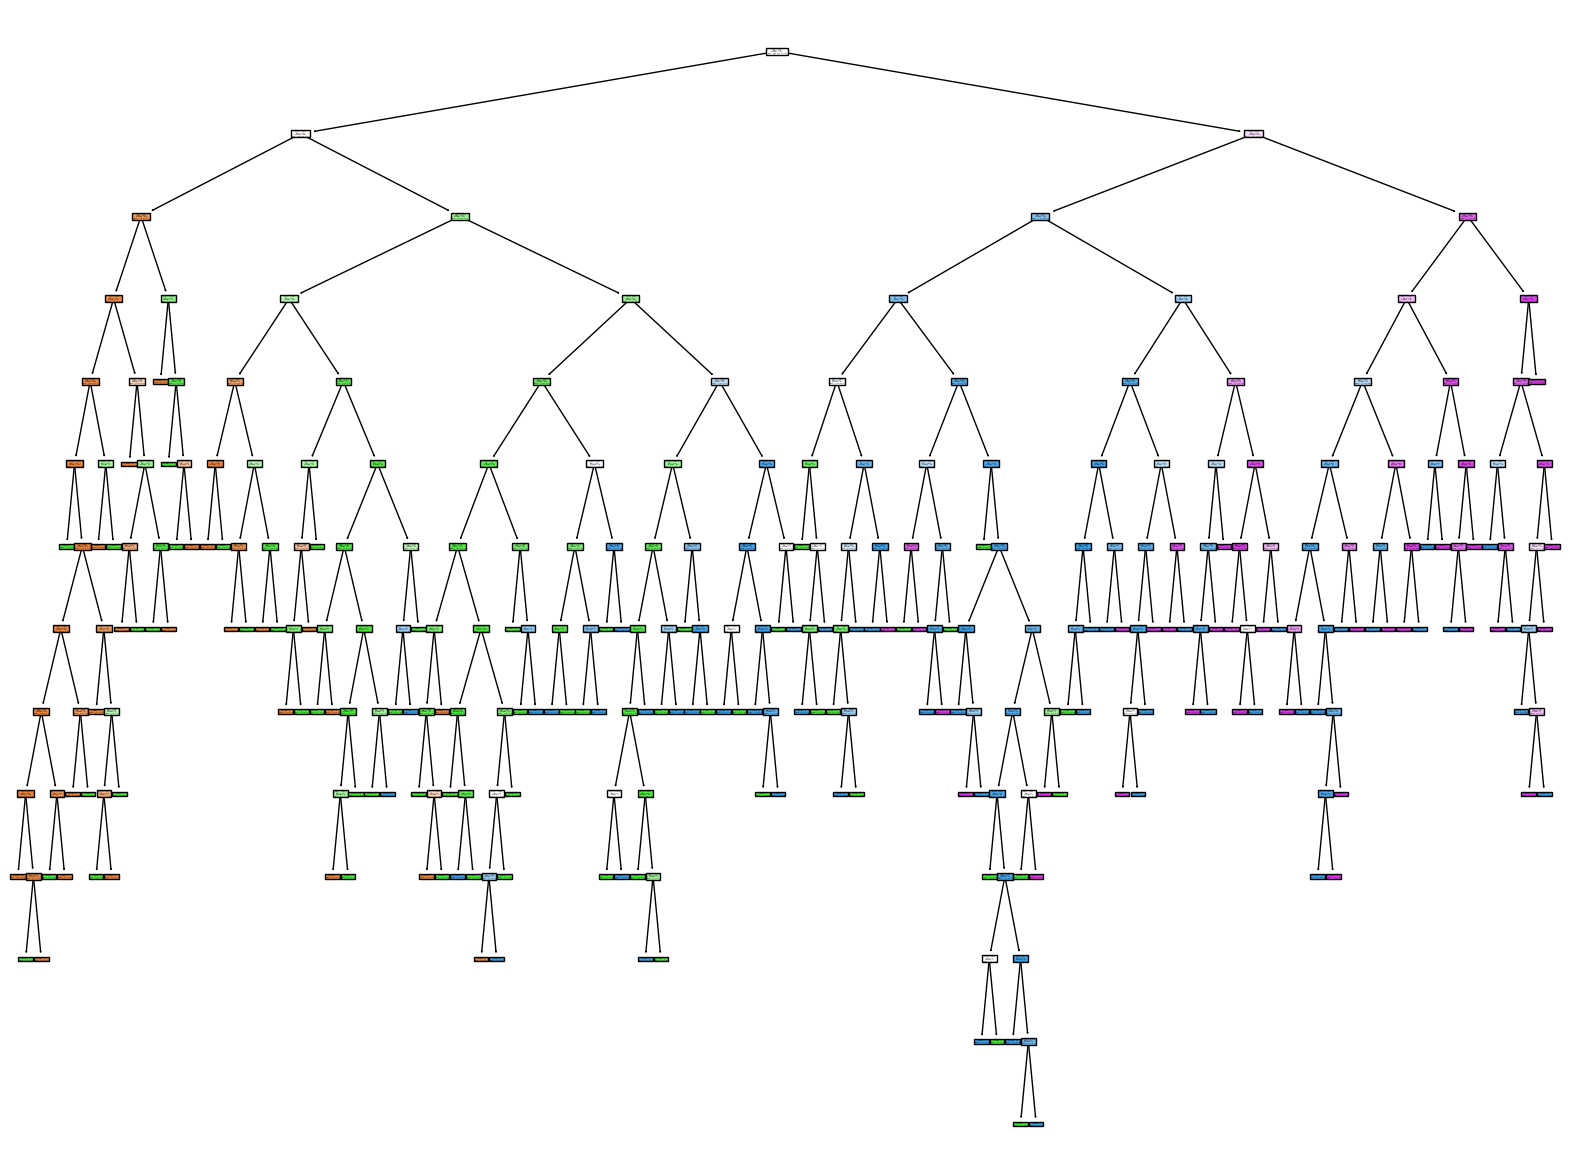

In [144]:
dtc=DecisionTreeClassifier(max_depth =25).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_val, y_val)))

plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       120
           1       0.76      0.80      0.78        95
           2       0.77      0.80      0.79        90
           3       0.88      0.91      0.89        95

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



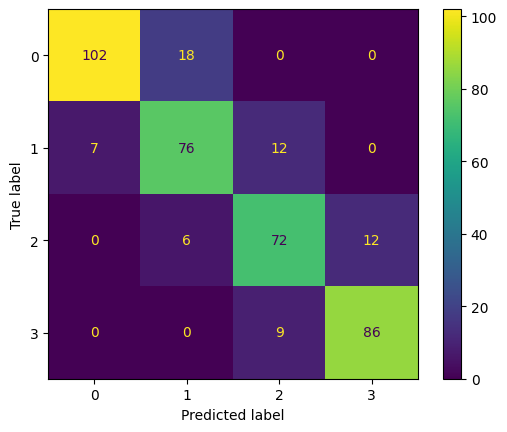

In [145]:
y_preds = dtc.predict(X_val)
evaluate_model(y_val, y_preds)

### Random Forest

In [146]:
forest_reg = RandomForestClassifier( max_depth=5, n_estimators=50)
forest_reg.fit(X_train, y_train)


forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Accuracy score (test) ',forest_reg.score(X_val,y_val))

Accuracy score (training) 0.901875
Accuracy score (test)  0.815


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       120
           1       0.74      0.80      0.77        95
           2       0.71      0.62      0.66        90
           3       0.83      0.89      0.86        95

    accuracy                           0.81       400
   macro avg       0.80      0.81      0.80       400
weighted avg       0.82      0.81      0.81       400



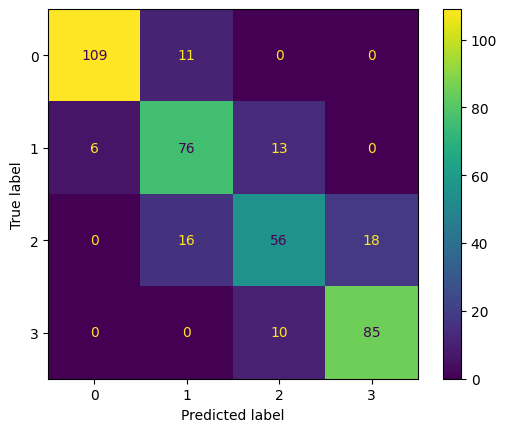

In [147]:
y_preds = forest_reg.predict(X_val)
evaluate_model(y_val, y_preds)

In [148]:
forest_reg = RandomForestClassifier( max_depth=25, n_estimators=75)
forest_reg.fit(X_train, y_train)


forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Accuracy score (test) ',forest_reg.score(X_val,y_val))

Accuracy score (training) 1.0
Accuracy score (test)  0.8475


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       120
           1       0.78      0.80      0.79        95
           2       0.74      0.78      0.76        90
           3       0.89      0.88      0.89        95

    accuracy                           0.85       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.85      0.85       400



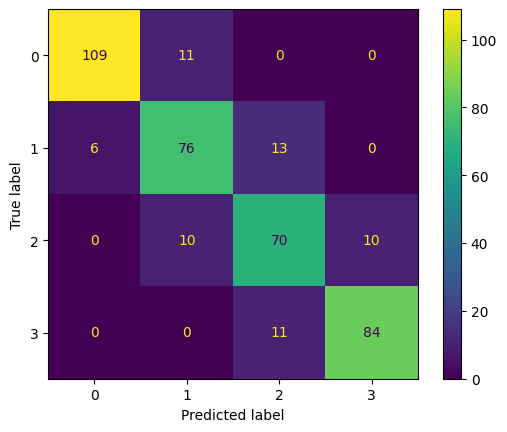

In [149]:
y_preds = forest_reg.predict(X_val)
evaluate_model(y_val, y_preds)

In [150]:
forest_reg = RandomForestClassifier( max_depth=15, n_estimators=50)
forest_reg.fit(X_train, y_train)


forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Accuracy score (test) ',forest_reg.score(X_val,y_val))

Accuracy score (training) 1.0
Accuracy score (test)  0.8375


              precision    recall  f1-score   support

           0       0.91      0.88      0.89       120
           1       0.74      0.78      0.76        95
           2       0.77      0.79      0.78        90
           3       0.91      0.89      0.90        95

    accuracy                           0.84       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400



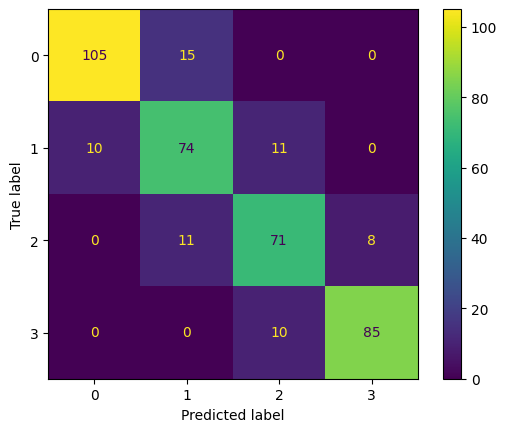

In [151]:
y_preds = forest_reg.predict(X_val)
evaluate_model(y_val, y_preds)

### KNN

In [152]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
score_knn = knn.score(X_val,y_val)
print('The accuracy of the K-nearest neighbors Model is',score_knn)

The accuracy of the K-nearest neighbors Model is 0.595


              precision    recall  f1-score   support

           0       0.76      0.76      0.76       120
           1       0.42      0.46      0.44        95
           2       0.41      0.46      0.43        90
           3       0.82      0.65      0.73        95

    accuracy                           0.59       400
   macro avg       0.60      0.58      0.59       400
weighted avg       0.61      0.59      0.60       400



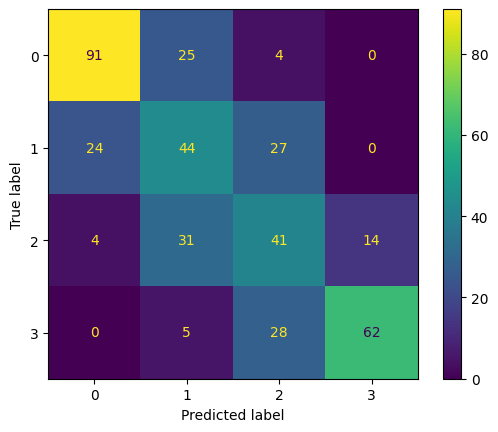

In [153]:
y_preds = knn.predict(X_val)
evaluate_model(y_val, y_preds)

In [154]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
score_knn = knn.score(X_val,y_val)
print('The accuracy of the K-nearest neighbors Model is',score_knn)

The accuracy of the K-nearest neighbors Model is 0.685


              precision    recall  f1-score   support

           0       0.88      0.75      0.81       120
           1       0.54      0.64      0.59        95
           2       0.53      0.66      0.59        90
           3       0.85      0.67      0.75        95

    accuracy                           0.69       400
   macro avg       0.70      0.68      0.69       400
weighted avg       0.72      0.69      0.69       400



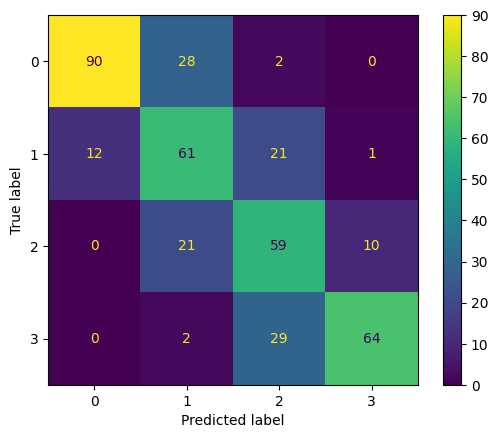

In [155]:
y_preds = knn.predict(X_val)
evaluate_model(y_val, y_preds)

### Logistic Regession

In [156]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)

log_clf.fit(X_train,y_train)


print('Accuracy of Logistic regression classifier on train set:' , log_clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:' , log_clf.score(X_val, y_val))

Accuracy of Logistic regression classifier on train set: 0.85125
Accuracy of Logistic regression classifier on test set: 0.835


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       120
           1       0.74      0.68      0.71        95
           2       0.68      0.63      0.66        90
           3       0.89      0.98      0.93        95

    accuracy                           0.83       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.83      0.83      0.83       400



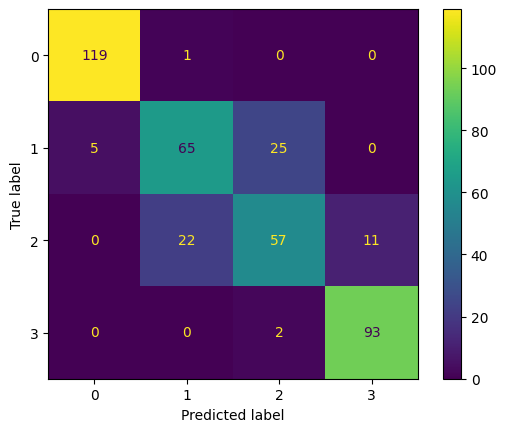

In [157]:
y_preds = log_clf.predict(X_val)
evaluate_model(y_val, y_preds)

In [158]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=5.0)

log_clf.fit(X_train,y_train)


print('Accuracy of Logistic regression classifier on train set:' , log_clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:' , log_clf.score(X_val, y_val))

Accuracy of Logistic regression classifier on train set: 0.87
Accuracy of Logistic regression classifier on test set: 0.85


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       120
           1       0.74      0.72      0.73        95
           2       0.70      0.67      0.68        90
           3       0.92      0.99      0.95        95

    accuracy                           0.85       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.85      0.85       400



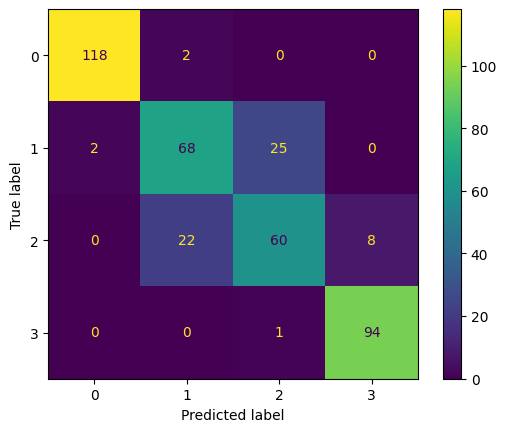

In [159]:
y_preds = log_clf.predict(X_val)
evaluate_model(y_val, y_preds)

### SVC

In [160]:
C = 1.0
np.random.seed(42)

clfc = SVC(C=C,kernel = 'linear',gamma =2.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(C)
title = 'Linear SVC, C = {:.3f}'.format(C)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(X_val, y_val)))
clfc

Accuracy of RBF-kernel SVC on training set: 0.97
Accuracy of RBF-kernel SVC on test set: 0.95


SVC(gamma=2.5, kernel='linear')

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       120
           1       0.93      0.94      0.93        95
           2       0.94      0.92      0.93        90
           3       0.95      0.99      0.97        95

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



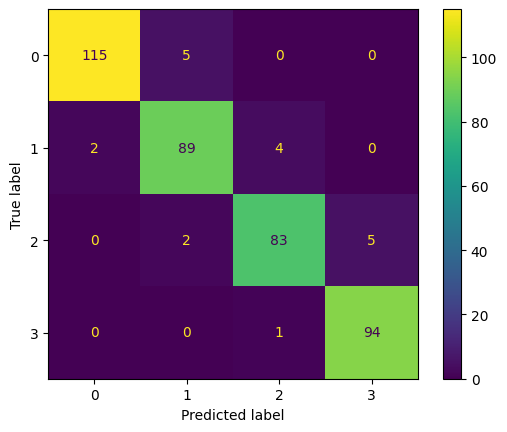

In [161]:
y_preds = clfc.predict(X_val)
evaluate_model(y_val, y_preds)

In [162]:
C = 5.0
np.random.seed(42)

clfc = SVC(C=C,kernel = 'linear',gamma =1.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(C)
title = 'Linear SVC, C = {:.3f}'.format(C)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(X_val, y_val)))
clfc

Accuracy of RBF-kernel SVC on training set: 0.98
Accuracy of RBF-kernel SVC on test set: 0.97


SVC(C=5.0, gamma=1.5, kernel='linear')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       0.97      0.95      0.96        95
           2       0.93      0.94      0.94        90
           3       0.97      0.99      0.98        95

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



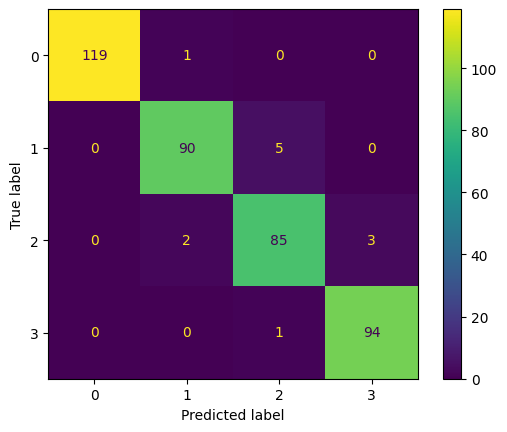

In [163]:
y_preds = clfc.predict(X_val)
evaluate_model(y_val, y_preds)

In [164]:
C = 20.0
np.random.seed(42)

clfc = SVC(C=C,kernel = 'linear',gamma =0.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(C)
title = 'Linear SVC, C = {:.3f}'.format(C)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(X_val, y_val)))
clfc

Accuracy of RBF-kernel SVC on training set: 0.99
Accuracy of RBF-kernel SVC on test set: 0.96


SVC(C=20.0, gamma=0.5, kernel='linear')

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       0.97      0.96      0.96        95
           2       0.93      0.92      0.93        90
           3       0.95      0.98      0.96        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



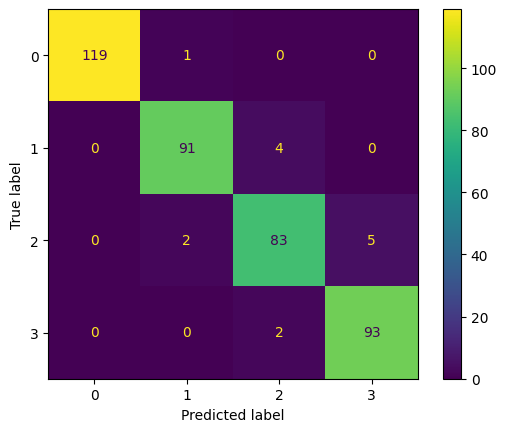

In [165]:
y_preds = clfc.predict(X_val)
evaluate_model(y_val, y_preds)

### Hyperparameter Tuning for RandomizedSearchCV

In [267]:
# Define SVM parameters
svm_parameters = {
    'C': np.logspace(-2, 2, 500),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': np.logspace(-3, 3, 500),
    'degree': [2, 3, 4, 5, 6, 7, 8],
    "probability": [True]
}

# Define RandomizedSearchCV
random_svm = SVC()
clf = RandomizedSearchCV(random_svm, svm_parameters, random_state=21, refit=True, cv=5, verbose=0, n_iter=200)

# Start time counter
start_time = time()

# Perform hyperparameter search
search = clf.fit(X_train, y_train)

end_time = time()

# Calculate elapsed time
elapsed_time = end_time - start_time
elapsed_time = elapsed_time/60

# Print best parameters and elapsed time
print(f"Best Parameters: {search.best_params_}")
print(f"Elapsed Time: {elapsed_time:.2f} minutes")


Best Parameters: {'probability': True, 'kernel': 'linear', 'gamma': 68.18162294944479, 'degree': 5, 'C': 9.24553109823357}
Elapsed Time: 10.66 minutes


In [268]:
clf.best_score_

0.9650000000000001

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       0.98      0.96      0.97        95
           2       0.94      0.93      0.94        90
           3       0.96      0.99      0.97        95

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



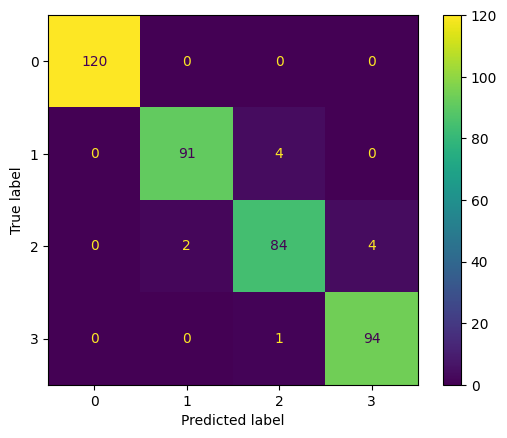

In [269]:
y_preds = clf.predict(X_val)
evaluate_model(y_val, y_preds)

### Hyperparameter Tuning for  Grid Search

In [270]:
grid_params = {
    'C': np.logspace(1.6, 1.8, 10),
    'kernel': ['linear'],
    'gamma': np.logspace(-1.5, -1, 10),
    'degree': [5,6,7,8,9,10],
    "probability": [True]
}


grid_clf = GridSearchCV(SVC(), grid_params, cv = 3, scoring='accuracy',verbose=3)

# Start time counter
start_time = time()

grid_clf.fit(X_train, y_train)

end_time = time()

# Calculate elapsed time
elapsed_time = end_time - start_time
elapsed_time = elapsed_time/60

# Print best parameters and elapsed time
print(f"Best Parameters: {search.best_params_}")
print(f"Elapsed Time: {elapsed_time:.2f} minutes")

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
[CV 1/3] END C=39.810717055349734, degree=5, gamma=0.03162277660168379, kernel=linear, probability=True;, score=0.966 total time=   0.7s
[CV 2/3] END C=39.810717055349734, degree=5, gamma=0.03162277660168379, kernel=linear, probability=True;, score=0.947 total time=   0.7s
[CV 3/3] END C=39.810717055349734, degree=5, gamma=0.03162277660168379, kernel=linear, probability=True;, score=0.947 total time=   0.6s
[CV 1/3] END C=39.810717055349734, degree=5, gamma=0.03593813663804628, kernel=linear, probability=True;, score=0.966 total time=   0.8s
[CV 2/3] END C=39.810717055349734, degree=5, gamma=0.03593813663804628, kernel=linear, probability=True;, score=0.947 total time=   0.7s
[CV 3/3] END C=39.810717055349734, degree=5, gamma=0.03593813663804628, kernel=linear, probability=True;, score=0.947 total time=   1.0s
[CV 1/3] END C=39.810717055349734, degree=5, gamma=0.04084238652674522, kernel=linear, probability=True;, score=0.

In [271]:
grid_clf.best_score_

0.9543675471326883

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       0.97      0.96      0.96        95
           2       0.93      0.91      0.92        90
           3       0.94      0.98      0.96        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



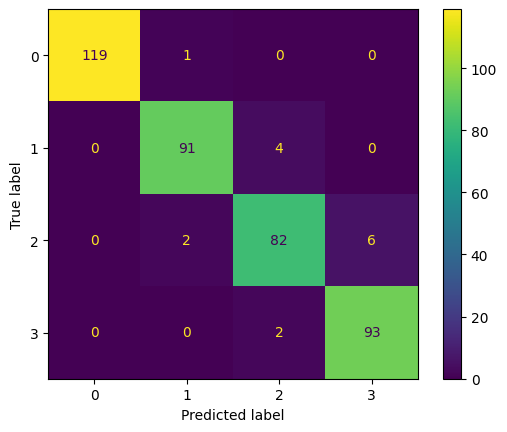

In [272]:
y_preds = grid_clf.predict(X_val)
evaluate_model(y_val, y_preds)

# **Adding features two**
Create new features based on existing ones.  
- screen_area (sc_h * sc_w)
- pixel_density (px_width * px_height / screen_area)
- battery_efficiency (talk_time / battery_power)
- camera_res (fc * pc)

unfortantly we can't calculate screen_area nor pixel_density because some of the sc_h values are equal to zero so some of the calcualted screen area's would be equal to zero which would lead to inf when would calcualte the pixel_density

In [288]:
!gdown https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/edit#gid=1607079722 -O train.xlsx

df = pd.read_excel("train.xlsx")
df.head()

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:44: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I
  warnings.warn(
Downloading...
From (original): https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/edit#gid=1607079722
From (redirected): https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/export?format=xlsx
To: /content/train.xlsx
174kB [00:00, 18.8MB/s]


battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0     1            1  
1          7        1             1     0            2  
2          9        1             1     0            2  
3         11        1             0     0            2  
4         15        1             1     0            1  

[5 rows x 21 columns]

In [289]:
import pandas as pd

# Calculate battery efficiency (assuming talk_time is in hours)
df['battery_efficiency'] = df['talk_time'] / df['battery_power']

# Calculate camera resoltion
df['camera_res'] = df['fc'] * df['pc']


In [290]:
df.head()

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...     ram  sc_h  sc_w  talk_time  three_g  \
0    0.6      188.0      2.0  ...  2549.0   9.0   7.0         19        0   
1    0.7      136.0      3.0  ...  2631.0  17.0   3.0          7        1   
2    0.9      145.0      5.0  ...  2603.0  11.0   2.0          9        1   
3    0.8      131.0      6.0  ...  2769.0  16.0   8.0         11        1   
4    0.6      141.0      2.0  ...  1411.0   8.0   2.0         15        1   

   touch_screen  wifi  price_range  battery_efficiency  camera_res  
0             0     1            1            0.022565         2.0  
1             1     0            2            0.006856         0.0  
2             1     0            2            0.015986        12.0  
3             0     0            2            0.017886         0.0  
4             1     0            1            0.008237       182.0  

[5 rows x 23 columns]

In [291]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  1995.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.310276   
std       439.418206     0.5001     0.816004     0.500035     4.335766   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  1995.000000  1995.000000  1995.000000  1996.000000  1996.000000  ...   
mean      0.521303    32.048120     0.502256   140.266533     4.518036  ...   
std       0.499671    18.146476     0.288530    35.384676     2.288946  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

               ram         sc_h         sc_w    talk_time      three_g  \
count  1998.000000  1999.000000  1999.000000  2000.000000  2000.000000   
mean   2124.262262    12.303652     5.766383    11.011000     0.761500   
std    1085.273372     4.212373     4.357400     5.463955     0.426273   
min     256.000000     5.000000     0.000000     2.000000     0.000000   
25%    1206.500000     9.000000     2.000000     6.000000     1.000000   
50%    2147.500000    12.000000     5.000000    11.000000     1.000000   
75%    3065.500000    16.000000     9.000000    16.000000     1.000000   
max    3998.000000    19.000000    18.000000    20.000000     1.000000   

       touch_screen         wifi  price_range  battery_efficiency   camera_res  
count   2000.000000  2000.000000  2000.000000         2000.000000  1993.000000  
mean       0.503000     0.507000     1.500000            0.010211    59.630206  
std        0.500116     0.500076     1.118314            0.006763    76.483036  
min        0.000000     0.000000     0.000000            0.001011     0.000000  
25%        0.000000     0.000000     0.750000            0.005371     2.000000  
50%        1.000000     1.000000     1.500000            0.008979    28.000000  
75%        1.000000     1.000000     2.250000            0.013204    90.000000  
max        1.000000     1.000000     3.000000            0.039841   380.000000  

[8 rows x 23 columns]

In [292]:
from pandas.plotting import scatter_matrix

matrix = df.corr(numeric_only=True)
target = matrix["price_range"].sort_values(ascending=False)

target

price_range           1.000000
ram                   0.917119
battery_power         0.200723
px_width              0.166094
px_height             0.148184
int_memory            0.042589
sc_w                  0.038777
pc                    0.034639
camera_res            0.029344
fc                    0.024999
three_g               0.023611
sc_h                  0.023300
talk_time             0.021859
blue                  0.020573
wifi                  0.018785
dual_sim              0.017444
four_g                0.015494
n_cores               0.004598
m_dep                -0.000083
clock_speed          -0.006606
touch_screen         -0.030411
mobile_wt            -0.032457
battery_efficiency   -0.098104
Name: price_range, dtype: float64

# Modeling

In [293]:
X = df.drop("price_range",axis=1)
y = df["price_range"]

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,
                                               random_state=21)

print(f"Train distrubistion {y_train.value_counts()/len(y_train)}")
print(f"Train distrubistion {y_val.value_counts()/len(y_val)}")


Train distrubistion price_range
2    0.256250
1    0.253125
3    0.253125
0    0.237500
Name: count, dtype: float64
Train distrubistion price_range
0    0.3000
3    0.2375
1    0.2375
2    0.2250
Name: count, dtype: float64


In [294]:
categorical_features = ["blue", "dual_sim", "four_g", "n_cores", "three_g","touch_screen", "wifi"]


numerical_features = [col for col in X.columns if col not in categorical_features]

In [295]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing values with most frequent term
    ('encoder', OneHotEncoder()) # Perform one-hot encoding
])

In [296]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Fill missing values with median
    ('scaler', StandardScaler()) # Perform standard scaling
])

In [297]:
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

In [298]:
# Fit and transform the data using the preprocessor pipeline
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)

## Training

### Decision Tree Classifier

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.84


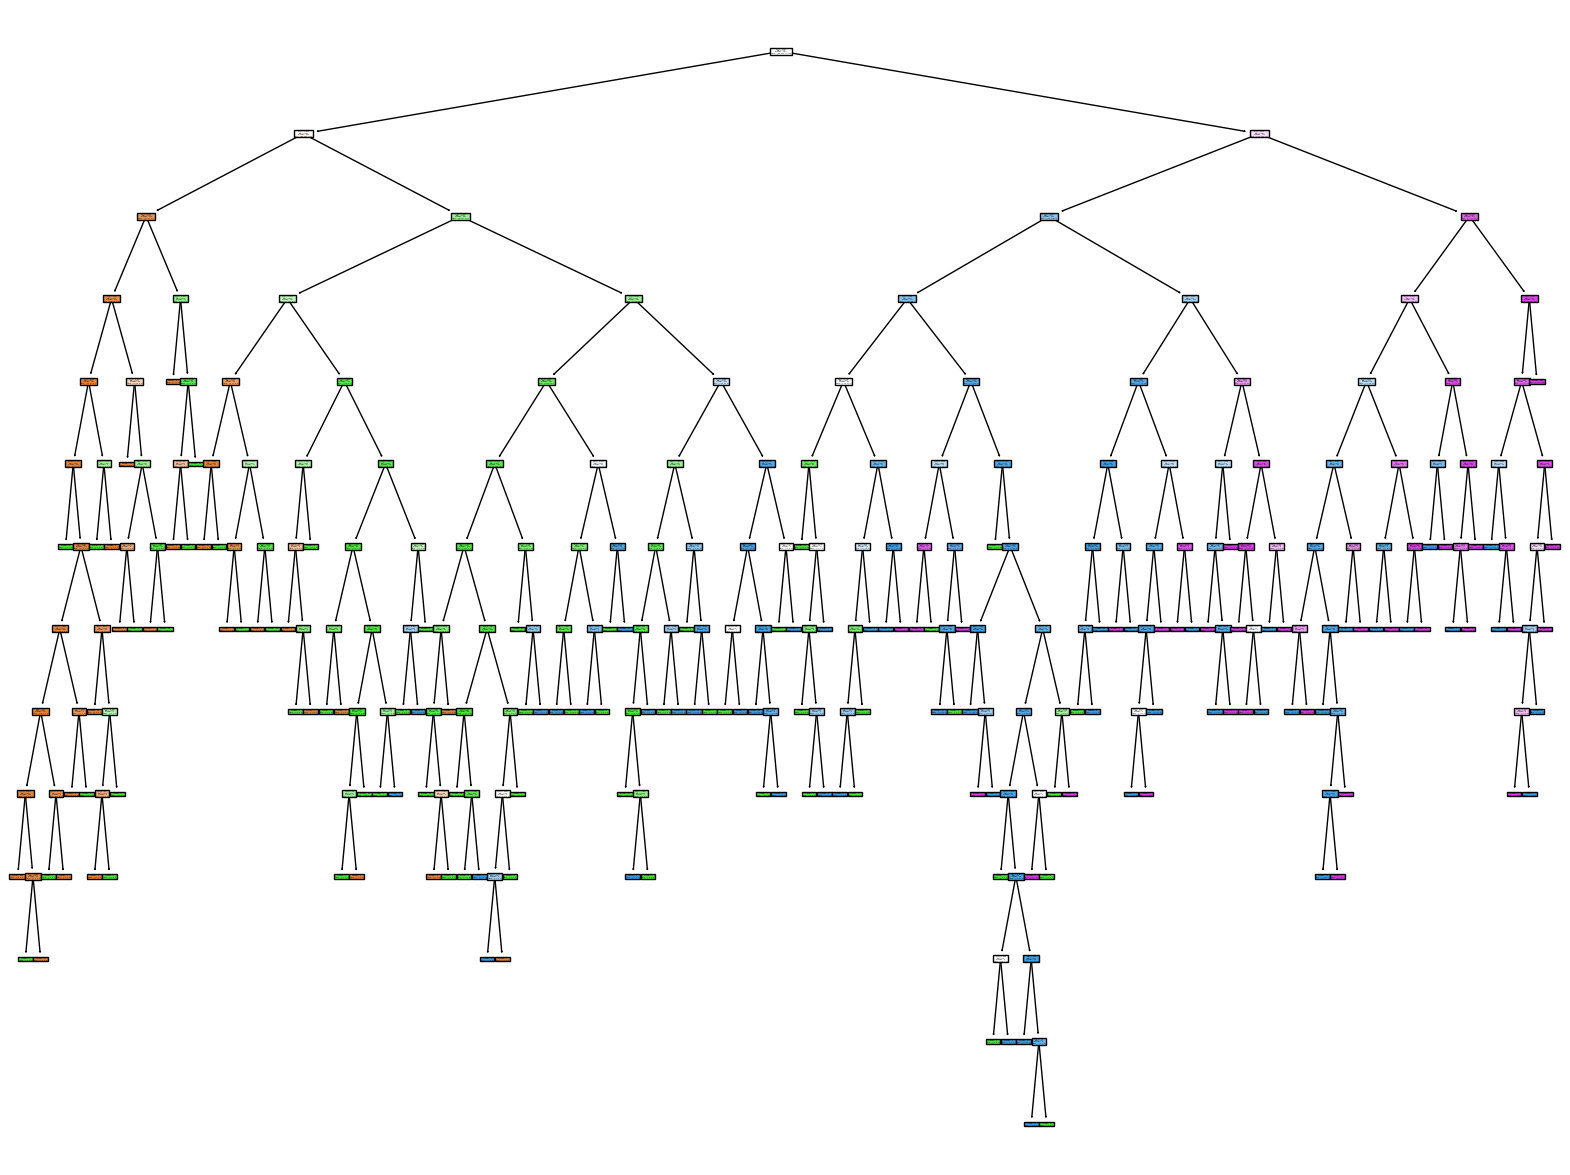

In [177]:
dtc=DecisionTreeClassifier(max_depth =15).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_val, y_val)))

plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       120
           1       0.77      0.74      0.75        95
           2       0.75      0.80      0.77        90
           3       0.87      0.94      0.90        95

    accuracy                           0.84       400
   macro avg       0.83      0.84      0.83       400
weighted avg       0.84      0.84      0.84       400



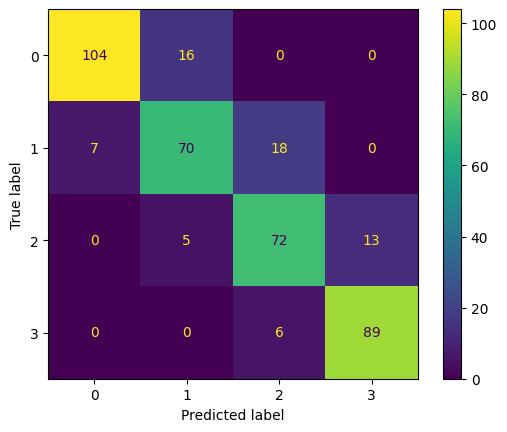

In [178]:
y_preds = dtc.predict(X_val)
evaluate_model(y_val, y_preds)

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.82


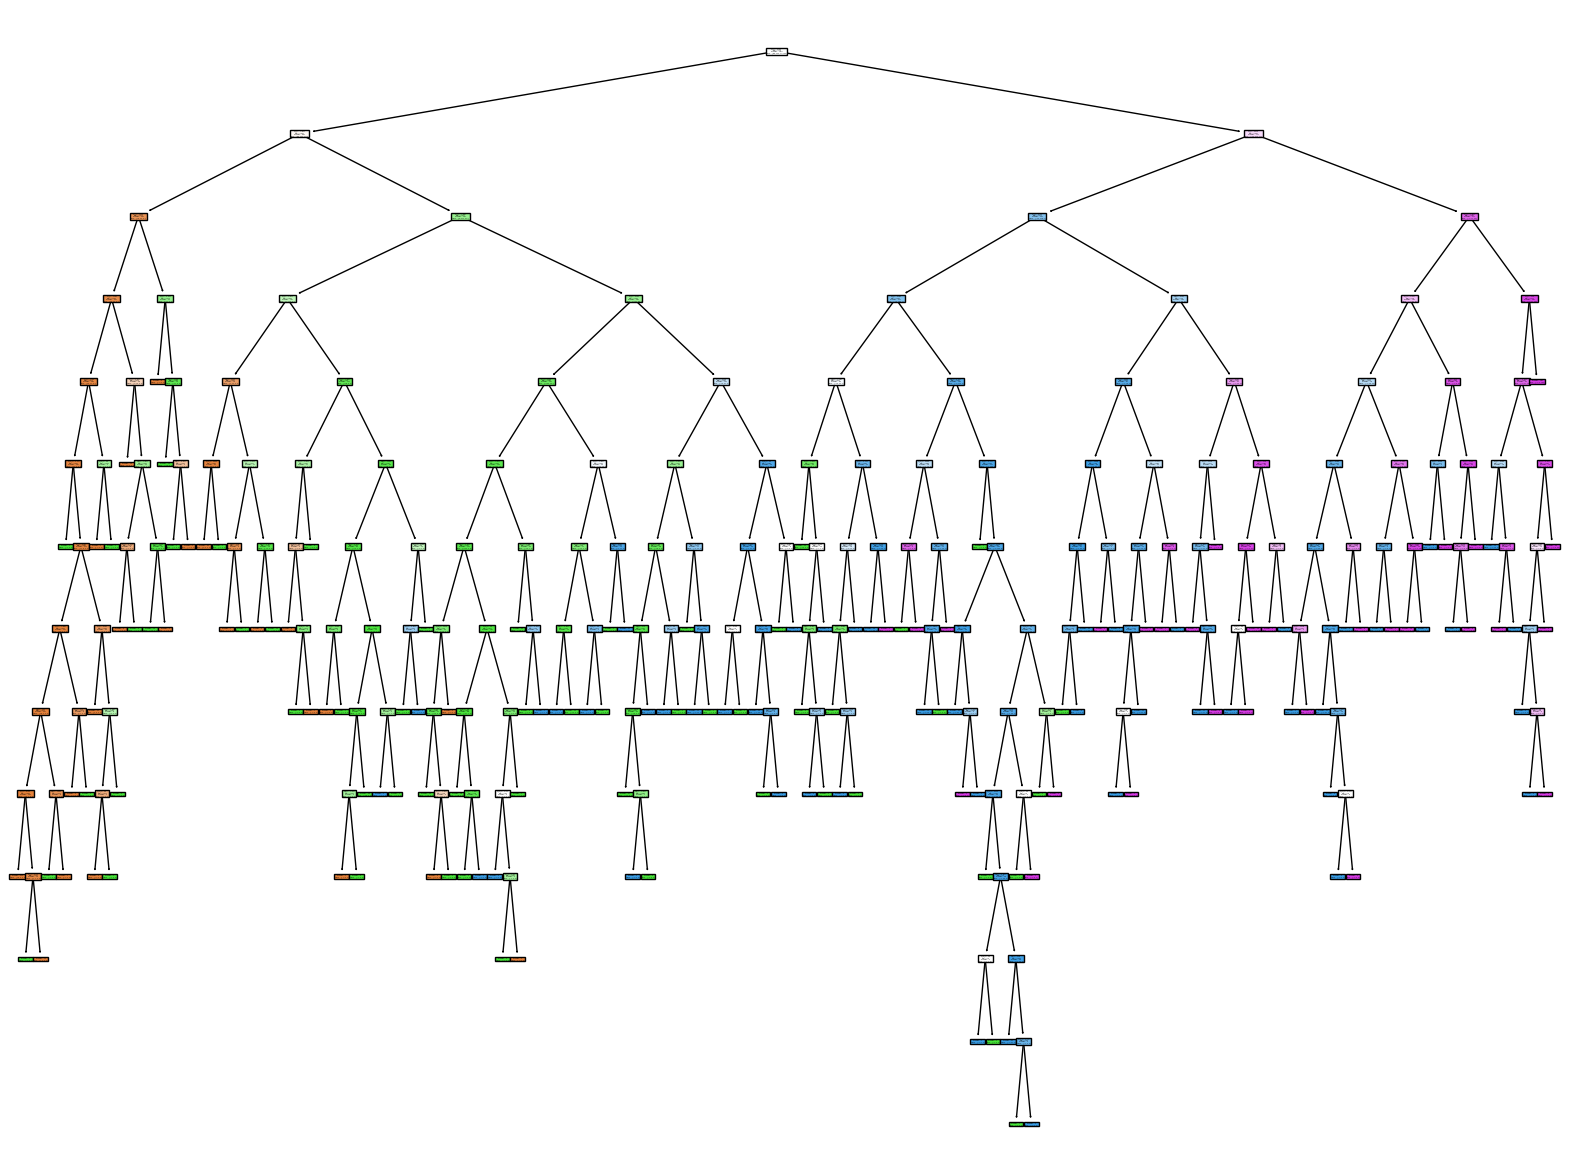

In [179]:
dtc=DecisionTreeClassifier(max_depth =25).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dtc.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dtc.score(X_val, y_val)))

plt.figure(figsize=(20,15))
plot_tree(dtc, filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       120
           1       0.74      0.77      0.75        95
           2       0.74      0.78      0.76        90
           3       0.87      0.89      0.88        95

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.83      0.82      0.82       400



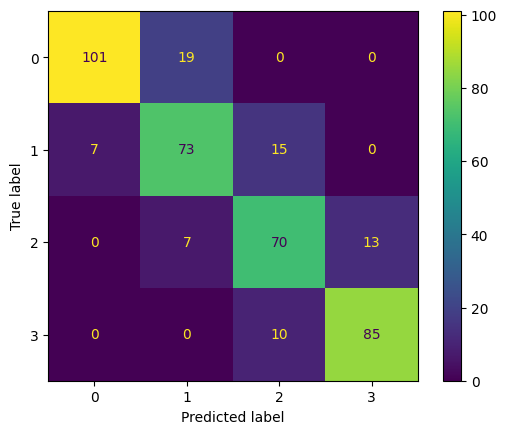

In [180]:
y_preds = dtc.predict(X_val)
evaluate_model(y_val, y_preds)

### Random Forest

In [181]:
forest_reg = RandomForestClassifier( max_depth=5, n_estimators=50)
forest_reg.fit(X_train, y_train)


forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Accuracy score (test) ',forest_reg.score(X_val,y_val))

Accuracy score (training) 0.898125
Accuracy score (test)  0.8025


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       120
           1       0.71      0.71      0.71        95
           2       0.72      0.69      0.70        90
           3       0.84      0.92      0.88        95

    accuracy                           0.80       400
   macro avg       0.79      0.80      0.79       400
weighted avg       0.80      0.80      0.80       400



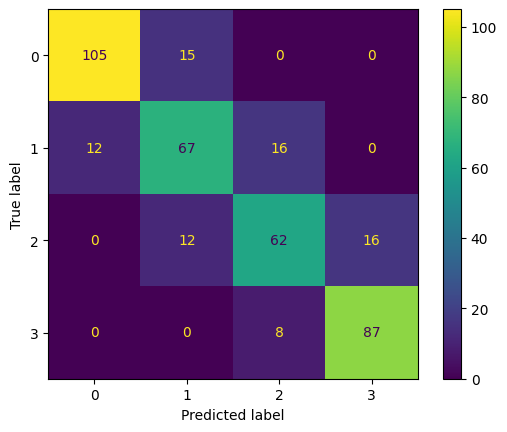

In [182]:
y_preds = forest_reg.predict(X_val)
evaluate_model(y_val, y_preds)

In [183]:
forest_reg = RandomForestClassifier( max_depth=25, n_estimators=50)
forest_reg.fit(X_train, y_train)


forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Accuracy score (test) ',forest_reg.score(X_val,y_val))

Accuracy score (training) 1.0
Accuracy score (test)  0.8625


              precision    recall  f1-score   support

           0       0.95      0.92      0.93       120
           1       0.81      0.83      0.82        95
           2       0.81      0.74      0.77        90
           3       0.86      0.94      0.90        95

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



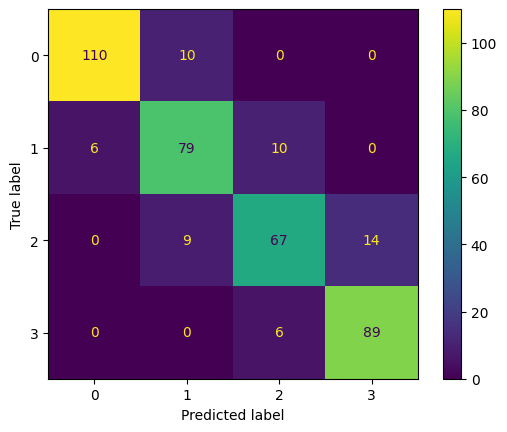

In [184]:
y_preds = forest_reg.predict(X_val)
evaluate_model(y_val, y_preds)

In [185]:
forest_reg = RandomForestClassifier( max_depth=15, n_estimators=100)
forest_reg.fit(X_train, y_train)


forest_reg.fit(X_train, y_train)
score_randomforest = forest_reg.score(X_val,y_val)
print('Accuracy score (training)',forest_reg.score(X_train,y_train))
print('Accuracy score (test) ',forest_reg.score(X_val,y_val))

Accuracy score (training) 1.0
Accuracy score (test)  0.8425


              precision    recall  f1-score   support

           0       0.93      0.89      0.91       120
           1       0.76      0.78      0.77        95
           2       0.77      0.77      0.77        90
           3       0.89      0.92      0.90        95

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



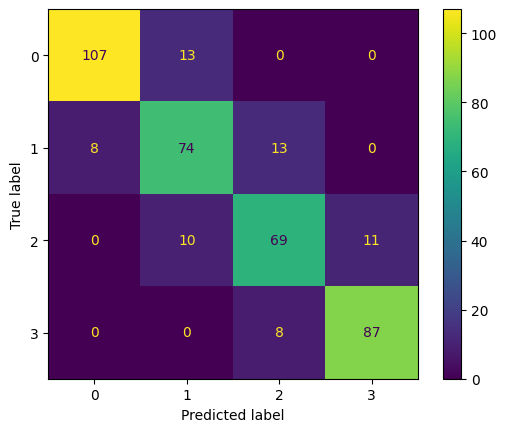

In [186]:
y_preds = forest_reg.predict(X_val)
evaluate_model(y_val, y_preds)

### KNN

In [187]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
score_knn = knn.score(X_val,y_val)
print('The accuracy of the K-nearest neighbors Model is',score_knn)

The accuracy of the K-nearest neighbors Model is 0.6


              precision    recall  f1-score   support

           0       0.76      0.76      0.76       120
           1       0.43      0.49      0.46        95
           2       0.42      0.44      0.43        90
           3       0.82      0.65      0.73        95

    accuracy                           0.60       400
   macro avg       0.61      0.59      0.59       400
weighted avg       0.62      0.60      0.61       400



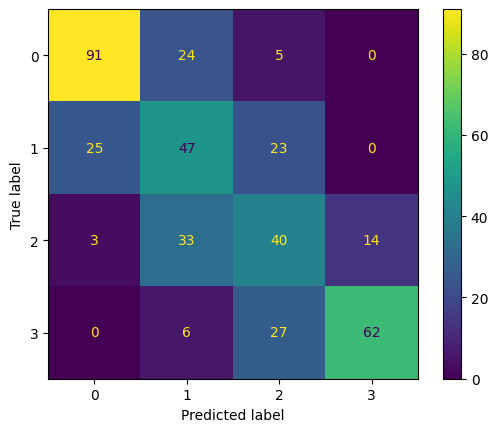

In [188]:
y_preds =  knn.predict(X_val)
evaluate_model(y_val, y_preds)

In [189]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
score_knn = knn.score(X_val,y_val)
print('The accuracy of the K-nearest neighbors Model is',score_knn)

The accuracy of the K-nearest neighbors Model is 0.6725


              precision    recall  f1-score   support

           0       0.86      0.73      0.79       120
           1       0.51      0.62      0.56        95
           2       0.53      0.64      0.58        90
           3       0.89      0.67      0.77        95

    accuracy                           0.67       400
   macro avg       0.70      0.67      0.67       400
weighted avg       0.71      0.67      0.68       400



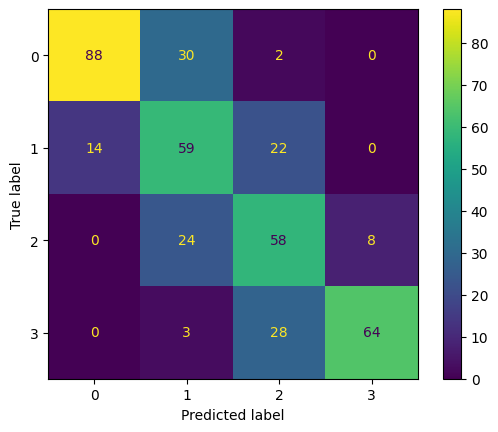

In [190]:
y_preds =  knn.predict(X_val)
evaluate_model(y_val, y_preds)

### Logisitic Regession

In [191]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=1.0)

log_clf.fit(X_train,y_train)


print('Accuracy of Logistic regression classifier on train set:' , log_clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:' , log_clf.score(X_val, y_val))

Accuracy of Logistic regression classifier on train set: 0.853125
Accuracy of Logistic regression classifier on test set: 0.83


              precision    recall  f1-score   support

           0       0.96      0.98      0.97       120
           1       0.73      0.67      0.70        95
           2       0.67      0.63      0.65        90
           3       0.89      0.98      0.93        95

    accuracy                           0.83       400
   macro avg       0.81      0.82      0.81       400
weighted avg       0.82      0.83      0.83       400



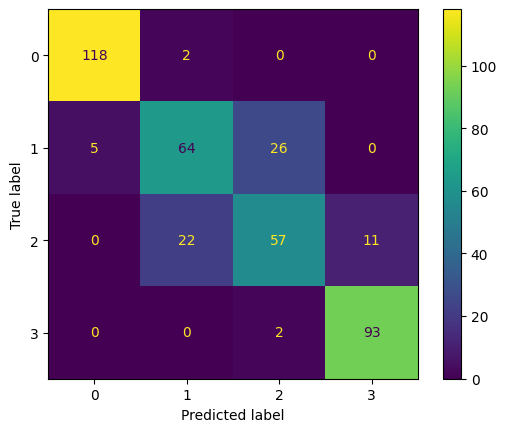

In [192]:
y_preds =  log_clf.predict(X_val)
evaluate_model(y_val, y_preds)

In [193]:
log_clf = LogisticRegression(solver='liblinear', penalty='l2', C=5.0)

log_clf.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on train set:', log_clf.score(X_train, y_train))
print('Accuracy of Logistic regression classifier on test set:', log_clf.score(X_val, y_val))


Accuracy of Logistic regression classifier on train set: 0.869375
Accuracy of Logistic regression classifier on test set: 0.845


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       120
           1       0.74      0.68      0.71        95
           2       0.69      0.68      0.68        90
           3       0.92      0.99      0.95        95

    accuracy                           0.84       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400



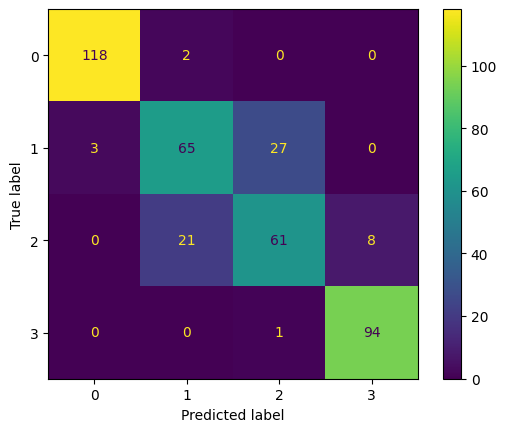

In [194]:
y_preds =  log_clf.predict(X_val)
evaluate_model(y_val, y_preds)

### SVC

In [195]:
C = 1.0
np.random.seed(42)

clfc = SVC(C=C,kernel = 'linear',gamma =2.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(C)
title = 'Linear SVC, C = {:.3f}'.format(C)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(X_val, y_val)))
clfc

Accuracy of RBF-kernel SVC on training set: 0.97
Accuracy of RBF-kernel SVC on test set: 0.96


SVC(gamma=2.5, kernel='linear')

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       120
           1       0.95      0.94      0.94        95
           2       0.93      0.92      0.93        90
           3       0.95      0.99      0.97        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



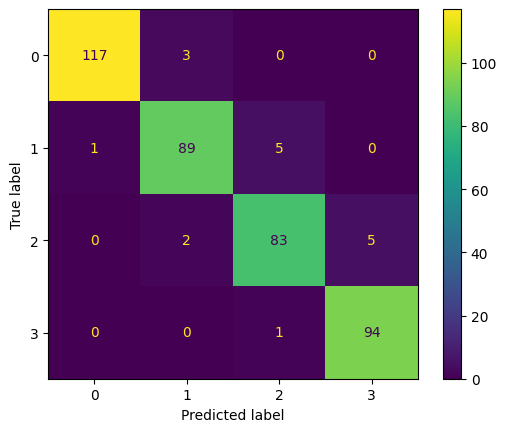

In [196]:
y_preds =  clfc.predict(X_val)
evaluate_model(y_val, y_preds)

In [197]:
C = 5.0
np.random.seed(42)

clfc = SVC(C=C,kernel = 'linear',gamma =1.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(C)
title = 'Linear SVC, C = {:.3f}'.format(C)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(X_val, y_val)))
clfc

Accuracy of RBF-kernel SVC on training set: 0.98
Accuracy of RBF-kernel SVC on test set: 0.97


SVC(C=5.0, gamma=1.5, kernel='linear')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       120
           1       0.97      0.94      0.95        95
           2       0.93      0.94      0.94        90
           3       0.97      0.99      0.98        95

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



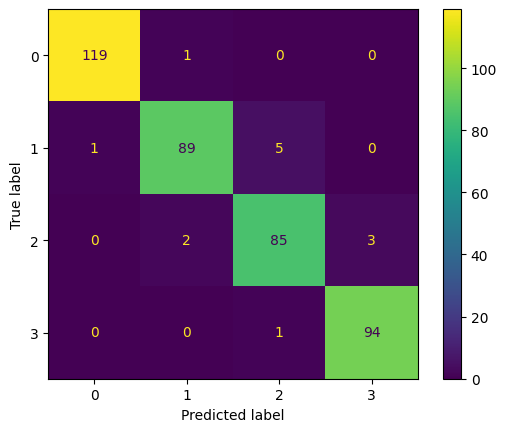

In [198]:
y_preds =  clfc.predict(X_val)
evaluate_model(y_val, y_preds)

In [199]:
C = 20.0
np.random.seed(42)

clfc = SVC(C=C,kernel = 'linear',gamma =0.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(C)
title = 'Linear SVC, C = {:.3f}'.format(C)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(X_val, y_val)))
clfc

Accuracy of RBF-kernel SVC on training set: 0.99
Accuracy of RBF-kernel SVC on test set: 0.96


SVC(C=20.0, gamma=0.5, kernel='linear')

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       120
           1       0.97      0.95      0.96        95
           2       0.93      0.92      0.93        90
           3       0.95      0.98      0.96        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



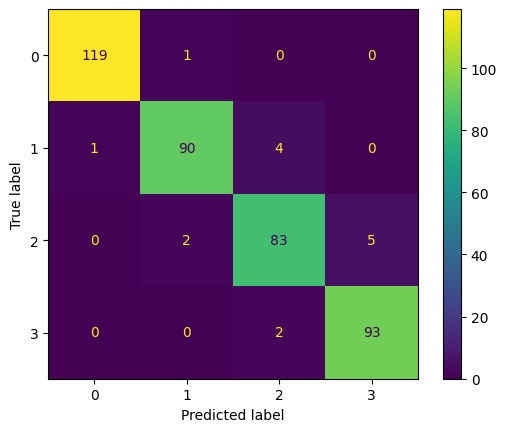

In [200]:
y_preds = clfc.predict(X_val)
evaluate_model(y_val, y_preds)

### Hyperparameter Tuning for RandomizedSearchCV

In [299]:
# Define SVM parameters
svm_parameters = {
    'C': np.logspace(-2, 2, 500),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': np.logspace(-3, 3, 500),
    'degree': [2, 3, 4, 5, 6, 7, 8],
    "probability": [True]
}

# Define RandomizedSearchCV
random_svm = SVC()
clf = RandomizedSearchCV(random_svm, svm_parameters, random_state=21, refit=True, cv=5, verbose=0, n_iter=200)

# Start time counter
start_time = time()

# Perform hyperparameter search
search = clf.fit(X_train, y_train)

end_time = time()

# Calculate elapsed time
elapsed_time = end_time - start_time
elapsed_time = elapsed_time/60

# Print best parameters and elapsed time
print(f"Best Parameters: {search.best_params_}")
print(f"Elapsed Time: {elapsed_time:.2f} minutes")


Best Parameters: {'probability': True, 'kernel': 'linear', 'gamma': 1.374917225806419, 'degree': 2, 'C': 4.029122027951348}
Elapsed Time: 11.35 minutes


In [300]:
clf.best_score_

0.9637499999999999

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       120
           1       0.97      0.94      0.95        95
           2       0.93      0.93      0.93        90
           3       0.96      0.99      0.97        95

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



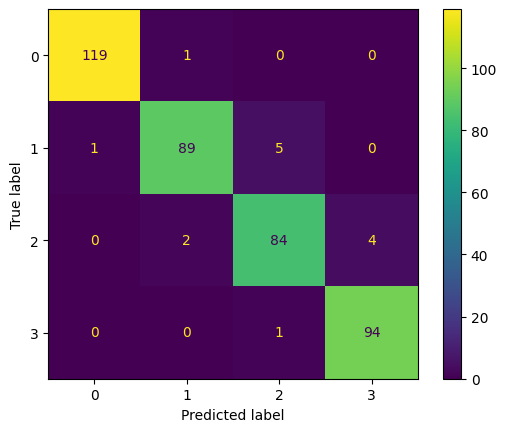

In [301]:
y_preds = clf.predict(X_val)
evaluate_model(y_val, y_preds)

### Hyperparameter Tuning for  Grid Search

In [302]:
grid_params = {
    'C': np.logspace(1.6, 1.8, 10),
    'kernel': ['linear'],
    'gamma': np.logspace(-1.5, -1, 10),
    'degree': [5,6,7,8,9,10],
    "probability": [True]
}


grid_clf = GridSearchCV(SVC(), grid_params, cv = 3, scoring='accuracy',verbose=3)

# Start time counter
start_time = time()

grid_clf.fit(X_train, y_train)

end_time = time()

# Calculate elapsed time
elapsed_time = end_time - start_time
elapsed_time = elapsed_time/60

# Print best parameters and elapsed time
print(f"Best Parameters: {search.best_params_}")
print(f"Elapsed Time: {elapsed_time:.2f} minutes")

Fitting 3 folds for each of 600 candidates, totalling 1800 fits
[CV 1/3] END C=39.810717055349734, degree=5, gamma=0.03162277660168379, kernel=linear, probability=True;, score=0.963 total time=   1.2s
[CV 2/3] END C=39.810717055349734, degree=5, gamma=0.03162277660168379, kernel=linear, probability=True;, score=0.932 total time=   0.7s
[CV 3/3] END C=39.810717055349734, degree=5, gamma=0.03162277660168379, kernel=linear, probability=True;, score=0.940 total time=   0.6s
[CV 1/3] END C=39.810717055349734, degree=5, gamma=0.03593813663804628, kernel=linear, probability=True;, score=0.963 total time=   1.0s
[CV 2/3] END C=39.810717055349734, degree=5, gamma=0.03593813663804628, kernel=linear, probability=True;, score=0.932 total time=   0.7s
[CV 3/3] END C=39.810717055349734, degree=5, gamma=0.03593813663804628, kernel=linear, probability=True;, score=0.940 total time=   0.7s
[CV 1/3] END C=39.810717055349734, degree=5, gamma=0.04084238652674522, kernel=linear, probability=True;, score=0.

In [303]:
grid_clf.best_score_

0.9506152019169285

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       120
           1       0.96      0.94      0.95        95
           2       0.93      0.91      0.92        90
           3       0.94      0.98      0.96        95

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.96      0.95      0.95       400



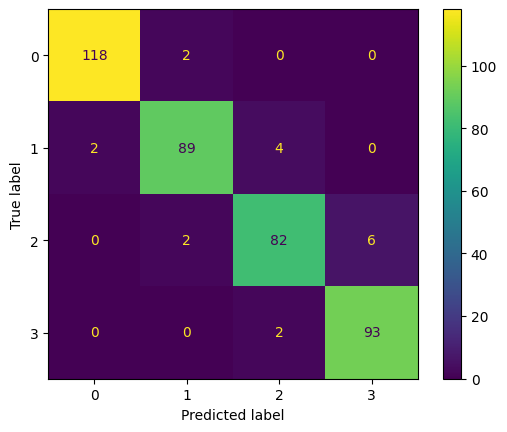

In [304]:
y_preds = grid_clf.predict(X_val)
evaluate_model(y_val, y_preds)

# Testing

In [202]:
!gdown https://docs.google.com/spreadsheets/d/1ChyuXQFc7ivtDxdEnbII2lRT3xc6OaMSZp_ud7arf9U/edit#gid=2082460844 -O test.xlsx

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:44: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1ChyuXQFc7ivtDxdEnbII2lRT3xc6OaMSZp_ud7arf9U
  warnings.warn(
Downloading...
From (original): https://docs.google.com/spreadsheets/d/1ChyuXQFc7ivtDxdEnbII2lRT3xc6OaMSZp_ud7arf9U/edit#gid=2082460844
From (redirected): https://docs.google.com/spreadsheets/d/1ChyuXQFc7ivtDxdEnbII2lRT3xc6OaMSZp_ud7arf9U/export?format=xlsx
To: /content/test.xlsx
92.7kB [00:00, 95.6MB/s]


In [203]:
test_df = pd.read_excel("test.xlsx")
test_df.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [204]:
test_df.isnull().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [205]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [206]:
test_df.count()

id               1000
battery_power    1000
blue             1000
clock_speed      1000
dual_sim         1000
fc               1000
four_g           1000
int_memory       1000
m_dep            1000
mobile_wt        1000
n_cores          1000
pc               1000
px_height        1000
px_width         1000
ram              1000
sc_h             1000
sc_w             1000
talk_time        1000
three_g          1000
touch_screen     1000
wifi             1000
dtype: int64

In [207]:
test_df.nunique()

id               1000
battery_power     721
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height         694
px_width          743
ram               872
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
dtype: int64

In [208]:
test_df.describe()

id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min       0.000000     0.000000     2.000000     0.100000    80.00000  ...   
25%       1.000000     0.000000    18.000000     0.300000   109.75000  ...   
50%       3.000000     0.000000    34.500000     0.500000   139.00000  ...   
75%       7.000000     1.000000    49.000000     0.800000   170.00000  ...   
max      19.000000     1.000000    64.000000     1.000000   200.00000  ...   

                pc    px_height     px_width          ram         sc_h  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     10.054000   627.121000  1239.774000  2138.998000    11.995000   
std       6.095099   432.929699   439.670981  1088.092278     4.320607   
min       0.000000     0.000000   501.000000   263.000000     5.000000   
25%       5.000000   263.750000   831.750000  1237.250000     8.000000   
50%      10.000000   564.500000  1250.000000  2153.500000    12.000000   
75%      16.000000   903.000000  1637.750000  3065.500000    16.000000   
max      20.000000  1907.000000  1998.000000  3989.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1000.000000  1000.000000  1000.000000    1000.00000  1000.000000  
mean      5.316000    11.085000     0.756000       0.50000     0.507000  
std       4.240062     5.497636     0.429708       0.50025     0.500201  
min       0.000000     2.000000     0.000000       0.00000     0.000000  
25%       2.000000     6.750000     1.000000       0.00000     0.000000  
50%       5.000000    11.000000     1.000000       0.50000     1.000000  
75%       8.000000    16.000000     1.000000       1.00000     1.000000  
max      18.000000    20.000000     1.000000       1.00000     1.000000  

[8 rows x 21 columns]

In [209]:
!gdown https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/edit#gid=1607079722 -O train.xlsx

/usr/local/lib/python3.10/dist-packages/gdown/parse_url.py:44: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I
  warnings.warn(
Downloading...
From (original): https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/edit#gid=1607079722
From (redirected): https://docs.google.com/spreadsheets/d/1C5K210JMYklz-_naYRaoxXPF6nZIGbXYrn0o0rBeY9I/export?format=xlsx
To: /content/train.xlsx
174kB [00:00, 56.9MB/s]


In [210]:
train_df = pd.read_excel("train.xlsx")
train_df.head()

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0     1            1  
1          7        1             1     0            2  
2          9        1             1     0            2  
3         11        1             0     0            2  
4         15        1             1     0            1  

[5 rows x 21 columns]

In [221]:
X = df.drop("price_range",axis=1)
y = df["price_range"]

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,
                                               random_state=21)

print(f"Train distrubistion {y_train.value_counts()/len(y_train)}")
print(f"Train distrubistion {y_val.value_counts()/len(y_val)}")


Train distrubistion price_range
2    0.256250
1    0.253125
3    0.253125
0    0.237500
Name: count, dtype: float64
Train distrubistion price_range
0    0.3000
3    0.2375
1    0.2375
2    0.2250
Name: count, dtype: float64


In [222]:
categorical_features = ["blue", "dual_sim", "four_g", "n_cores", "three_g","touch_screen", "wifi"]


numerical_features = [col for col in X.columns if col not in categorical_features]

In [223]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # Fill missing values with most frequent term
    ('encoder', OneHotEncoder()) # Perform one-hot encoding
])

In [224]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # Fill missing values with median
    ('scaler', StandardScaler()) # Perform standard scaling
])

In [225]:
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_features),
    ('categorical', categorical_pipeline, categorical_features)
])

In [226]:
# Fit and transform the data using the preprocessor pipeline
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)


In [227]:
C = 20.0
np.random.seed(42)

clfc = SVC(C=C,kernel = 'linear',gamma =0.5).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(C)
title = 'Linear SVC, C = {:.3f}'.format(C)
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clfc.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clfc.score(X_val, y_val)))
clfc

Accuracy of RBF-kernel SVC on training set: 0.99
Accuracy of RBF-kernel SVC on test set: 0.97


SVC(C=20.0, gamma=0.5, kernel='linear')

In [230]:
X_test = test_df.drop("id",axis=1)
X_test = X_test[list(X.columns)]

X_test = preprocessor.transform(X_test)
y_test_preds = clfc.predict(X_test)

In [231]:
test_df["price_range"] = y_test_preds

In [232]:
test_df.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0    0.1        193  ...        226      1412  3476    12     7          2   
1    0.8        191  ...        746       857  3895     6     0          7   
2    0.9        186  ...       1270      1366  2396    17    10         10   
3    0.5         96  ...        295      1752  3893    10     0          7   
4    0.5        108  ...        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  price_range  
0        0             1     0            3  
1        1             0     0            3  
2        0             1     1            2  
3        1             1     0            3  
4        1             0     1            1  

[5 rows x 22 columns]

In [ ]:
import pickle

In [ ]:
def save_pickle(var, path):
    with open(path, 'wb') as handle:
        pickle.dump(var, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
save_pickle(clfc,"/content/best_svm_model.pkl")
save_pickle(preprocessor,"/content/best_pipeline.pkl")

In [ ]:
test_df.to_csv("predicted_data.csv",index=False)